# Question 3: Unsupervised Learning
## 90-803 Machine Learning Foundations with Python (Spring 2024)
### Team 17: Yoko, Tessa, Hannah

This notebook attempts to explore question #3 of our project. <br><br>
**Question #3:** Are there any hidden structures or associations between housing prices and average temperature in this dataset that is worth exploring?<br>
*Target Variable:* None<br>
*Task:* Unsupervised learning to uncover hidden patterns in the dataset that are valuable for classification/grouping.

## Importing the Relevant Libraries

In [1]:
# common libraries
from datetime import datetime
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

# metrics
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score
from kneed import KneeLocator

# scalers
from sklearn.preprocessing import StandardScaler

# unsupervised learning (clustering) libraries
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from yellowbrick.cluster import KElbowVisualizer
from scipy.cluster.hierarchy import linkage,dendrogram
from sklearn.neighbors import NearestNeighbors

# PCA libraries
from sklearn.decomposition import PCA
from yellowbrick.features import PCA as PCA_viz

## Initial Exploration
We will first explore the dataset and pick the appropriate columns for unsurpervised learning (numerical feature only).

In [34]:
# read in the dataset
data = pd.read_csv("all_data_geo.csv", index_col=0)
data.head()

Year  Month          RegionName State  \
0  2000      1  Los Angeles County    CA   
1  2000      1  Los Angeles County    CA   
2  2000      1         Cook County    IL   
3  2000      1         Cook County    IL   
4  2000      1       Harris County    TX   

   Bottom-Tier Average Home Value Estimate  \
0                            122826.545216   
1                            122826.545216   
2                             71689.188026   
3                             71689.188026   
4                             61195.175569   

   Top-Tier Average Home Value Estimate  Average Temperature Value  \
0                         400192.738911                       52.3   
1                         400192.738911                       52.3   
2                         302264.545103                       24.9   
3                         302264.545103                       24.9   
4                         217850.462915                       57.4   

   Anomaly (1901-2000 base period)  1901-2000 Mean  \
0                              4.5            47.8   
1                              4.5            47.8   
2                              2.4            22.5   
3                              2.4            22.5   
4                              5.6            51.8   

   Initial Fees and Charges (%)  Effective Rate (%)  Term to Maturity  \
0                          0.93                8.01                15   
1                          0.81                8.20                30   
2                          0.93                8.01                15   
3                          0.81                8.20                30   
4                          0.93                8.01                15   

   Loan Amount ($thou)  Purchase Price ($thou)  Loan-to-Price Ratio (%)  \
0                103.0                   173.6                     64.7   
1                129.9                   166.8                     81.1   
2                103.0                   173.6                     64.7   
3                129.9                   166.8                     81.1   
4                103.0                   173.6                     64.7   

   Share of Total Market (%)        ALAND      AWATER   INTPTLAT    INTPTLON  
0                        7.0  10515988166  1785003207  34.196398 -118.261862  
1                       61.1  10515988166  1785003207  34.196398 -118.261862  
2                        7.0   2447342616  1786339408  41.894294  -87.645455  
3                       61.1   2447342616  1786339408  41.894294  -87.645455  
4                        7.0   4421145870   182187806  29.857273  -95.393037

In [35]:
# we cannot do unsupervised learning on columns that contains strings so we need to get the numeric columns we need out
unsupervised = data[data.columns.difference(['State', 'RegionName'])]
unsupervised.head(5)

1901-2000 Mean        ALAND      AWATER  Anomaly (1901-2000 base period)  \
0            47.8  10515988166  1785003207                              4.5   
1            47.8  10515988166  1785003207                              4.5   
2            22.5   2447342616  1786339408                              2.4   
3            22.5   2447342616  1786339408                              2.4   
4            51.8   4421145870   182187806                              5.6   

   Average Temperature Value  Bottom-Tier Average Home Value Estimate  \
0                       52.3                            122826.545216   
1                       52.3                            122826.545216   
2                       24.9                             71689.188026   
3                       24.9                             71689.188026   
4                       57.4                             61195.175569   

   Effective Rate (%)   INTPTLAT    INTPTLON  Initial Fees and Charges (%)  \
0                8.01  34.196398 -118.261862                          0.93   
1                8.20  34.196398 -118.261862                          0.81   
2                8.01  41.894294  -87.645455                          0.93   
3                8.20  41.894294  -87.645455                          0.81   
4                8.01  29.857273  -95.393037                          0.93   

   Loan Amount ($thou)  Loan-to-Price Ratio (%)  Month  \
0                103.0                     64.7      1   
1                129.9                     81.1      1   
2                103.0                     64.7      1   
3                129.9                     81.1      1   
4                103.0                     64.7      1   

   Purchase Price ($thou)  Share of Total Market (%)  Term to Maturity  \
0                   173.6                        7.0                15   
1                   166.8                       61.1                30   
2                   173.6                        7.0                15   
3                   166.8                       61.1                30   
4                   173.6                        7.0                15   

   Top-Tier Average Home Value Estimate  Year  
0                         400192.738911  2000  
1                         400192.738911  2000  
2                         302264.545103  2000  
3                         302264.545103  2000  
4                         217850.462915  2000

In [4]:
# check the shape of unsupervised
unsupervised.shape

(579894, 18)

In [5]:
# double check NaN values one more time
unsupervised.isnull().sum()

1901-2000 Mean                             0
ALAND                                      0
AWATER                                     0
Anomaly (1901-2000 base period)            0
Average Temperature Value                  0
Bottom-Tier Average Home Value Estimate    0
Effective Rate (%)                         0
INTPTLAT                                   0
INTPTLON                                   0
Initial Fees and Charges (%)               0
Loan Amount ($thou)                        0
Loan-to-Price Ratio (%)                    0
Month                                      0
Purchase Price ($thou)                     0
Share of Total Market (%)                  0
Term to Maturity                           0
Top-Tier Average Home Value Estimate       0
Year                                       0
dtype: int64

In [6]:
# have an overview of our dataset
unsupervised.describe()

1901-2000 Mean         ALAND        AWATER  \
count   579894.000000  5.798940e+05  5.798940e+05   
mean        54.317547  2.338742e+09  1.819740e+08   
std         17.099949  3.703393e+09  5.523955e+08   
min          1.800000  5.868388e+07  9.251200e+04   
25%         41.300000  1.055922e+09  1.047176e+07   
50%         55.500000  1.479110e+09  2.694270e+07   
75%         68.800000  2.206699e+09  8.116171e+07   
max         91.700000  5.197631e+10  1.405367e+10   

       Anomaly (1901-2000 base period)  Average Temperature Value  \
count                    579894.000000              579894.000000   
mean                          1.385632                  55.702485   
std                           3.388082                  17.135498   
min                         -22.200000                  -5.200000   
25%                          -0.700000                  42.800000   
50%                           1.300000                  57.200000   
75%                           3.400000                  70.000000   
max                          19.800000                  96.200000   

       Bottom-Tier Average Home Value Estimate  Effective Rate (%)  \
count                            579894.000000       579894.000000   
mean                              94103.848741            4.955709   
std                               64177.827177            1.232351   
min                                6109.396309            2.890000   
25%                               52879.469613            3.980000   
50%                               77205.031646            4.650000   
75%                              115764.095664            5.960000   
max                              915009.312632            8.550000   

            INTPTLAT       INTPTLON  Initial Fees and Charges (%)  \
count  579894.000000  579894.000000                 579894.000000   
mean       37.986718     -89.613755                      0.891515   
std         4.615860      12.635366                      0.365064   
min        25.586120    -124.210929                      0.180000   
25%        34.763109     -94.888456                      0.540000   
50%        38.423084     -86.034263                      0.910000   
75%        41.355319     -81.400955                      1.220000   
max        48.842653     -68.666616                      1.510000   

       Loan Amount ($thou)  Loan-to-Price Ratio (%)          Month  \
count        579894.000000            579894.000000  579894.000000   
mean            177.251586                72.512364       6.434317   
std              36.994047                 8.549974       3.466285   
min              60.300000                42.300000       1.000000   
25%             150.900000                67.100000       3.000000   
50%             179.800000                74.800000       6.000000   
75%             204.400000                80.300000       9.000000   
max             254.800000                83.500000      12.000000   

       Purchase Price ($thou)  Share of Total Market (%)  Term to Maturity  \
count           579894.000000              579894.000000     579894.000000   
mean               260.126543                  37.364843         22.500000   
std                 36.813915                  29.181675          7.500006   
min                124.000000                   1.300000         15.000000   
25%                237.700000                   7.700000         15.000000   
50%                262.500000                  32.450000         22.500000   
75%                286.100000                  65.500000         30.000000   
max                347.300000                  82.900000         30.000000   

       Top-Tier Average Home Value Estimate           Year  
count                          5.798940e+05  579894.000000  
mean                           2.851340e+05    2010.712761  
std                            2.108634e+05       5.361191  
min                            5.947229e+04    2000.000000  
25%            

> We definitely need to scale our dataset for unsupervised.

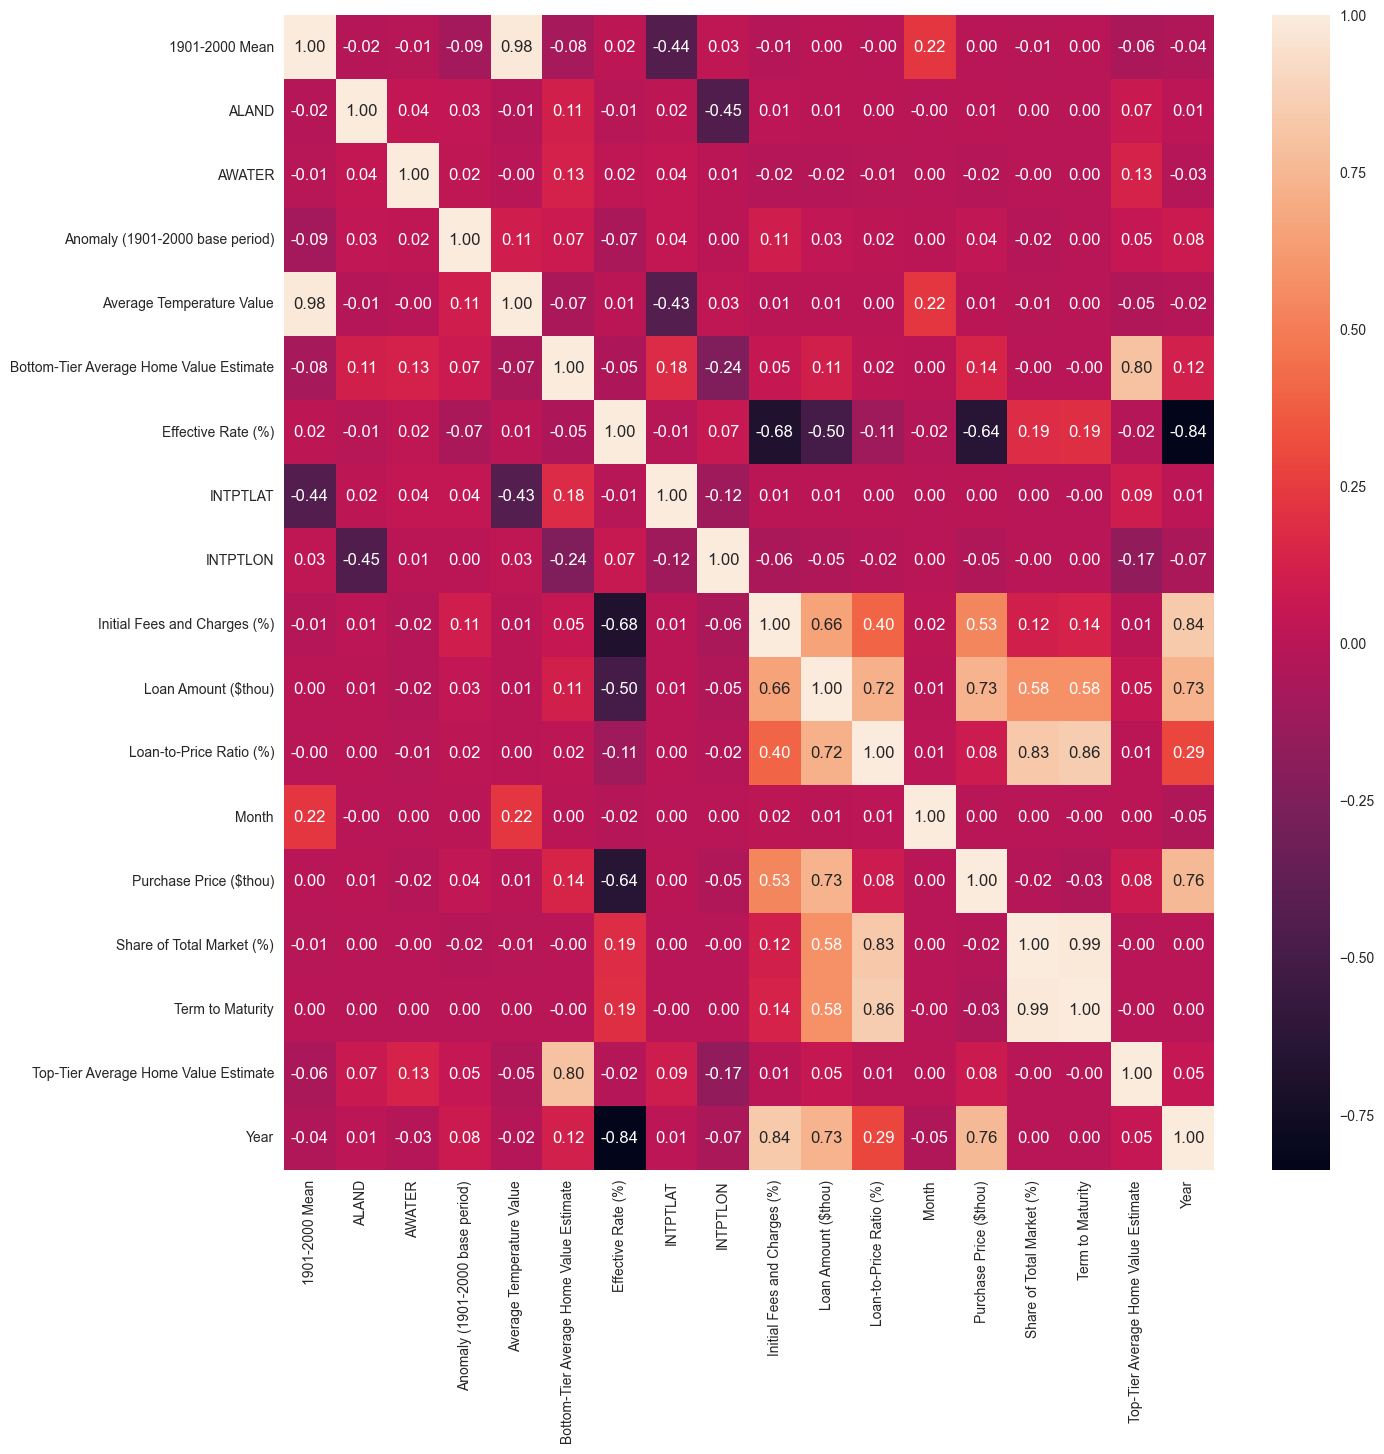

In [7]:
# double check colinearity
plt.figure(figsize=(15,15))
sns.heatmap(unsupervised.corr(), annot=True, fmt ='.2f')
plt.show()

> A brief glance shows that we have colinearity for many features such as initial fees and effective rates, effective rates and purchase prices, average temperature and 1901-2000 mean. We also have a lot of data with 18 features, so we should do PCA on our dataset for better unsupervised results.

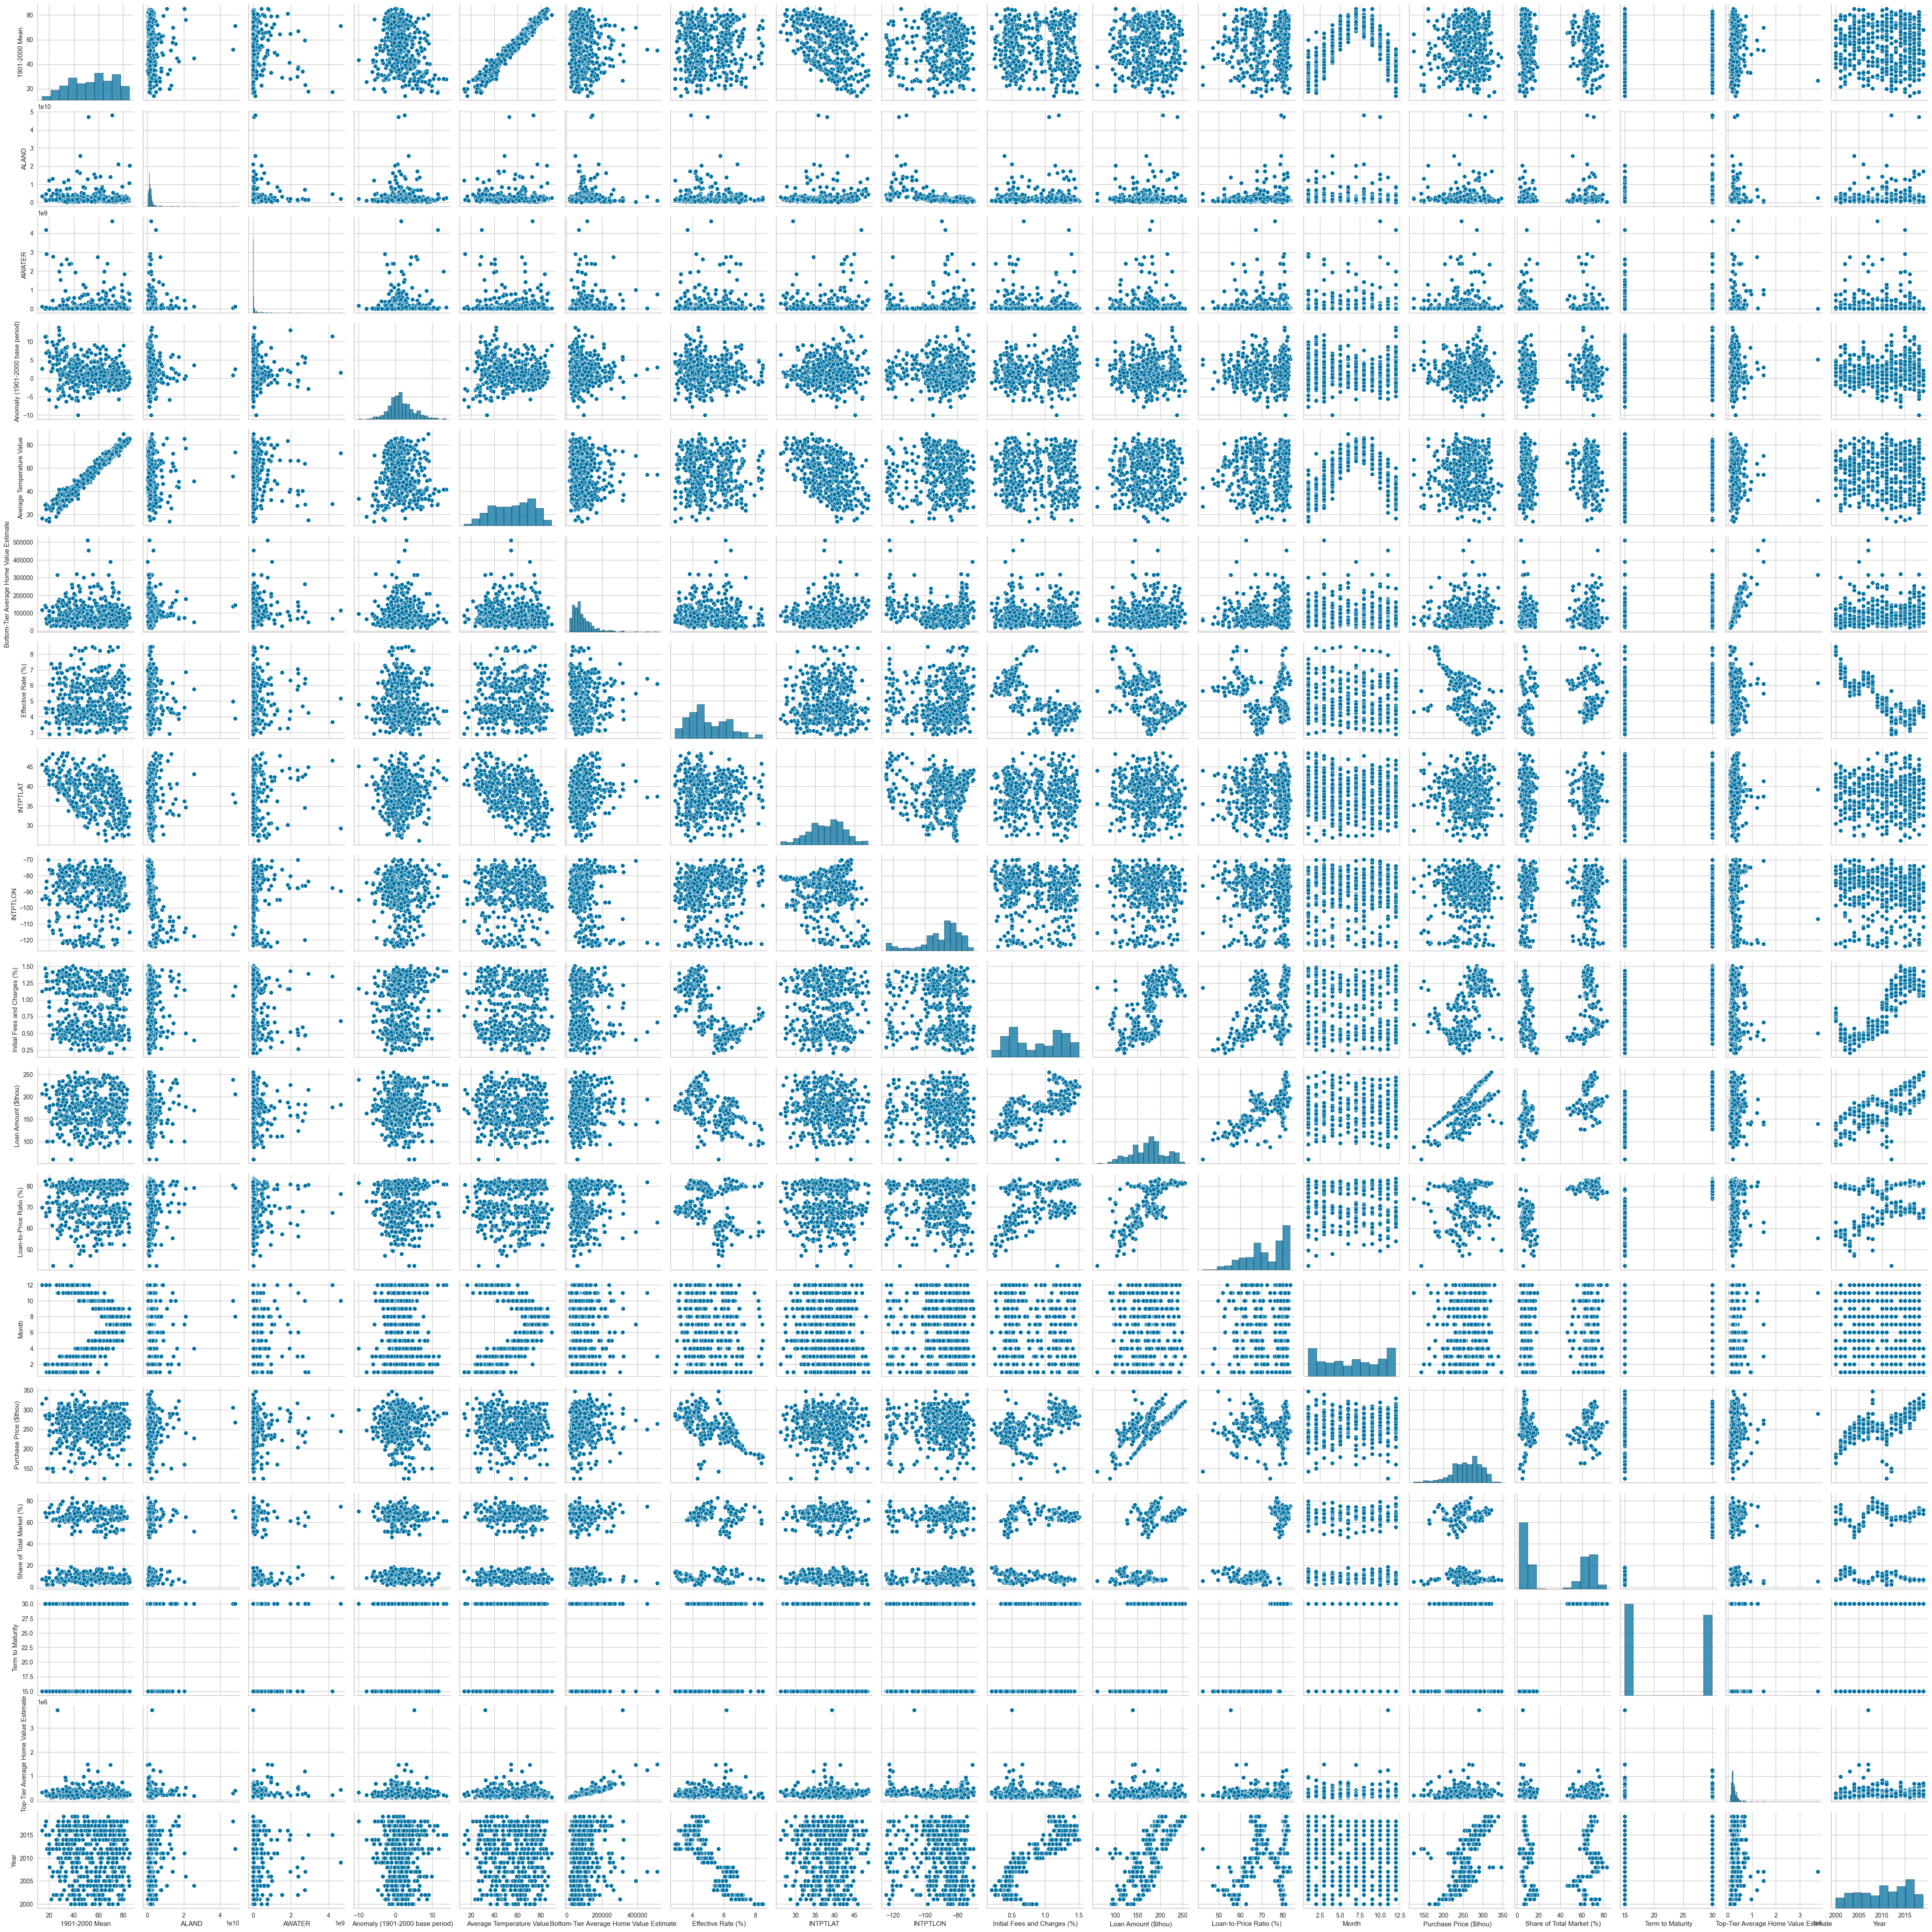

In [8]:
# visualize the clusters through a pairplot of a smaller sample of the dataset (it would take too long to plot the entire dataset)
sns.pairplot(unsupervised.sample(500))
plt.xticks(rotation = 45)
plt.show()

> It seems that Month, Year, and Term to Maturity are categorical values that create natural clusters but do not provide new information for our dataset. With a sample of 500 points, we can see some clustering with Share of Total Market.

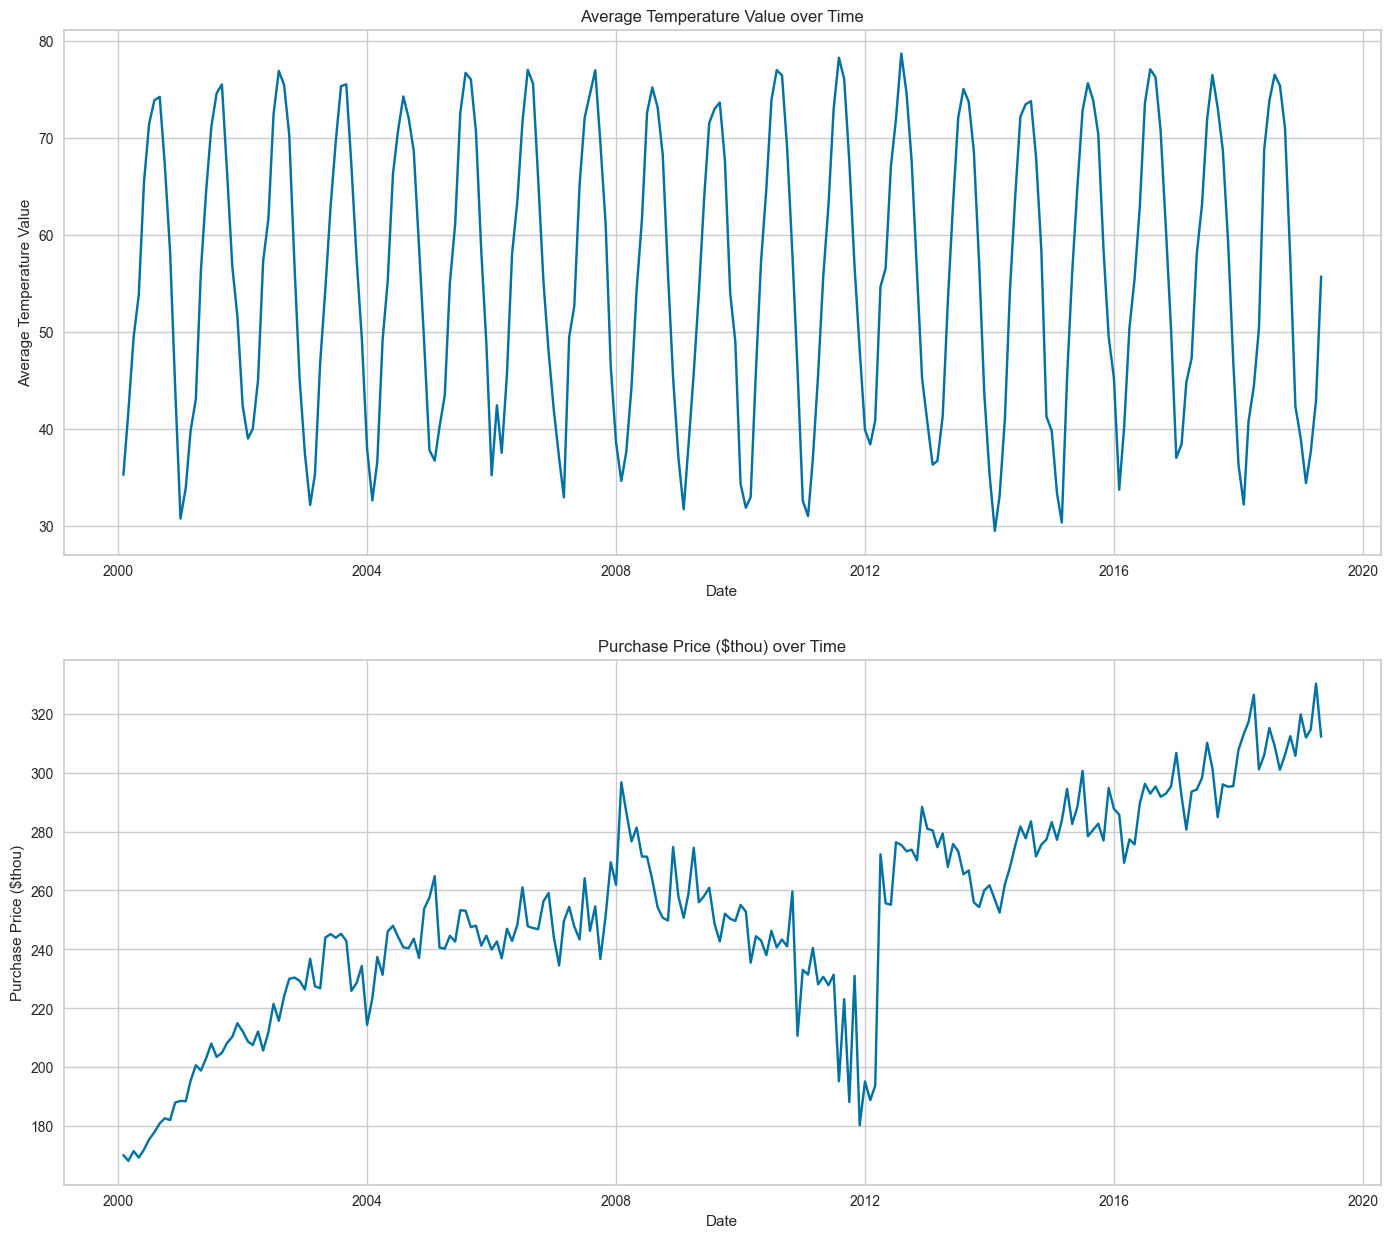

In [9]:
# we have a lot of data and one of our previous visualization shows seasonality so let us check that for housing prices and average temperature
# plotting average housing prices and average temperature over time to check for seasonality
fig, ax = plt.subplots(2,1, figsize=(17,15))

cols = ['Average Temperature Value', 'Purchase Price ($thou)']

for i in range(2):
    data = unsupervised[['Year','Month',cols[i]]].groupby(['Year','Month']).mean().reset_index()
    data['Date'] = pd.date_range(start="2000-01-01",end="2019-05-01", freq='ME').tolist()
    sns.lineplot(data = data, x = 'Date', y = cols[i], ax=ax[i]).set(title= cols[i]+' over Time')

plt.show()

> There clearly is seasonality for average temperature, but it's not clear for housing prices so let's zoom into two years: 2016 and 2017.

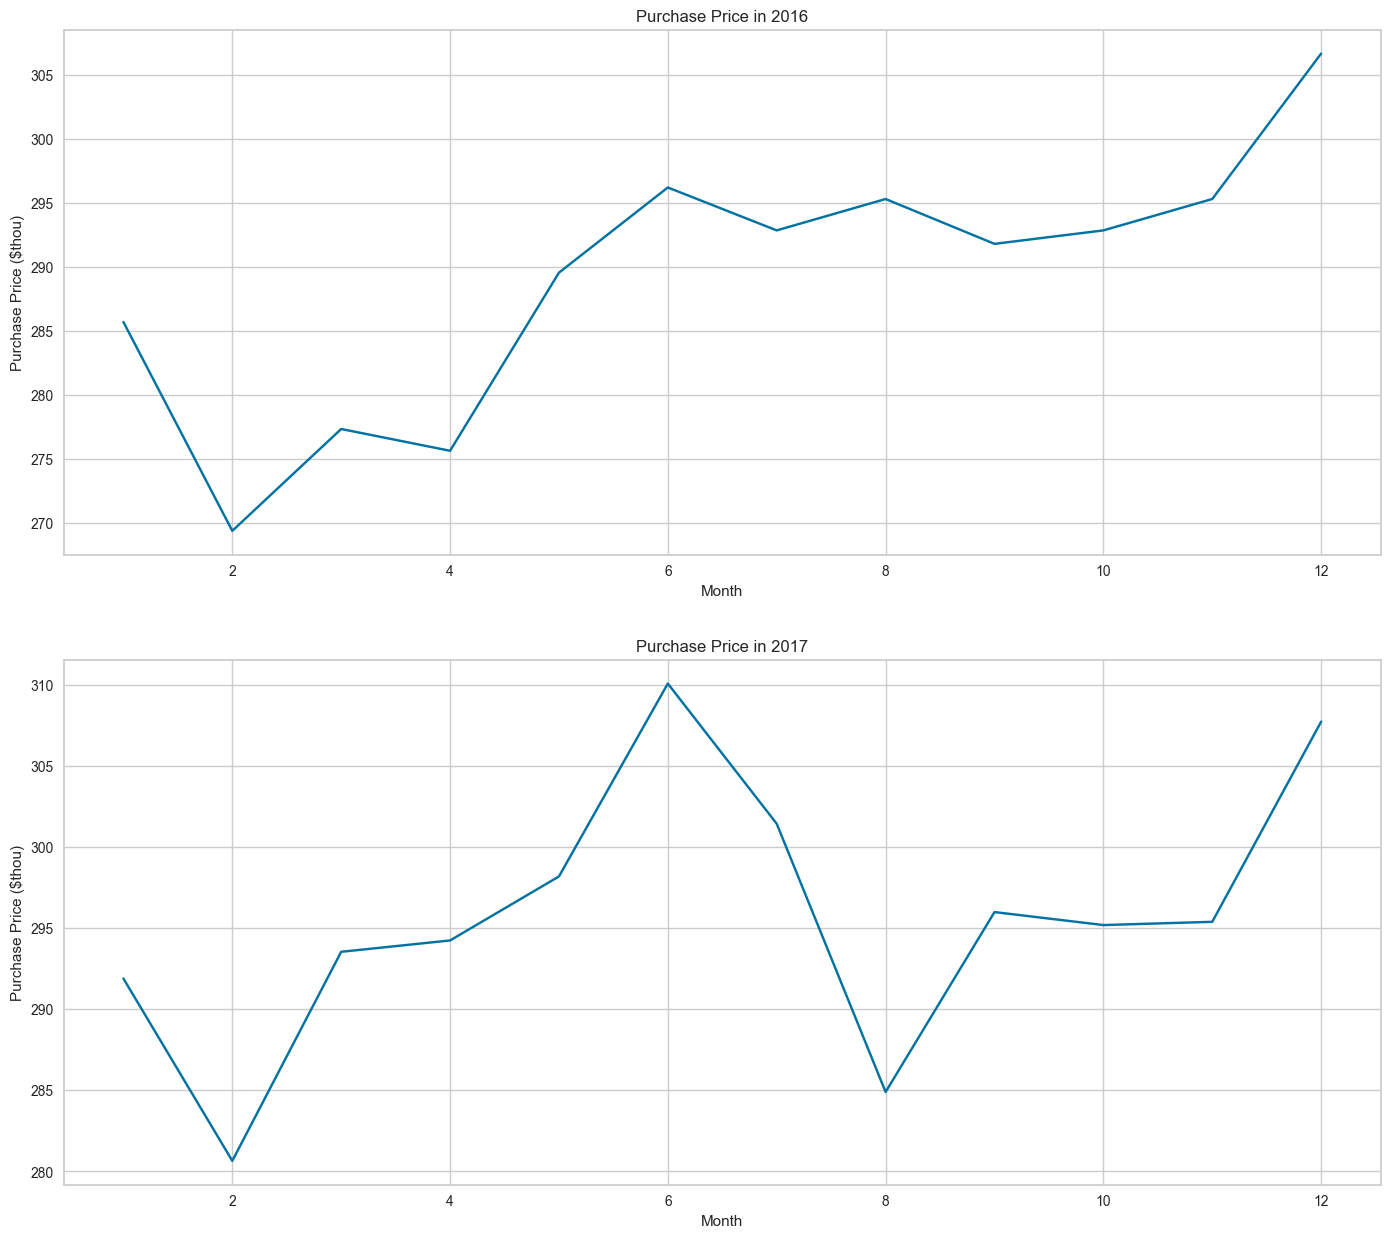

In [10]:
# plotting average housing prices for two years (2016, 2017) to have a better view of seasonality potentials
fig, ax = plt.subplots(2,1, figsize=(17,15))

year = [2016, 2017]

for i in range(2):
    sns.lineplot(data = data[data['Year']==year[i]], x = 'Month', y = 'Purchase Price ($thou)', ax=ax[i]).set(title= 'Purchase Price in '+str(year[i]))

plt.show()

> There might be some seasonality that affects our clusters. This is good to keep in mind when we get the result of our model.

### Exploration Conclusion:
Initial exploration shows that we must (1) drop categorical values, (2) scale our dataset, and (3) perform PCA.

(1) We need to drop categorical values because any clustering methods do not work well with mixed data. (see Ref 2) Since most of our features are numerical dropping the categorical features will help unsupervised algorithms perform better. Plus, we already know the categories so it won't tell us new information about the dataset. However, we should keep in mind that the clustering we uncovered might be heavily influenced by the dropped categorical values. 

(2) Scaling the dataset helps clustering methods, especially those that rely on the distance between data points, as well as PCA. It is recommended for PCA that we scale with StandardScaler because PCA relies on zero-centered inputs (see Ref 3).

(3) We clear have colinearity and instead of making decisions on which features to drop, PCA is a great tool to apply here. It also helps reduce dimensionality with our large dataset of 600,000 rows and 18 features.

## Feature Engineering:
In this part, we will sequentially address the 3 conclusions from our initial observation. The goal is to transform our data into a PC dataframe for further analysis. As a quick summary, these steps are:<br>
(1) Dropping categorical values<br>
(2) Scaling the dataset<br>
(3) Perform CPA

### (1) Dropping Categorical Values

In [36]:
# dropping columns with high correlations with an existing datatype and dropping categorical data
cols = ['Month', 'Year', 'Term to Maturity']
unsupervised = unsupervised.drop(columns=cols)

### (2) Scaling the Dataset

In [37]:
#initalize a scaler
scaler = StandardScaler()

#scale the data
scaled_features = scaler.fit_transform(unsupervised)

# getting a scaled dataframe
X = pd.DataFrame(scaled_features, columns = unsupervised.columns)

#check out the first few rows
X.head()

1901-2000 Mean     ALAND    AWATER  Anomaly (1901-2000 base period)  \
0       -0.381145  2.208044  2.901962                         0.919214   
1       -0.381145  2.208044  2.901962                         0.919214   
2       -1.860682  0.029325  2.904380                         0.299393   
3       -1.860682  0.029325  2.904380                         0.299393   
4       -0.147226  0.562297  0.000387                         1.243881   

   Average Temperature Value  Bottom-Tier Average Home Value Estimate  \
0                  -0.198564                                 0.447549   
1                  -0.198564                                 0.447549   
2                  -1.797585                                -0.349259   
3                  -1.797585                                -0.349259   
4                   0.099064                                -0.512774   

   Effective Rate (%)  INTPTLAT  INTPTLON  Initial Fees and Charges (%)  \
0            2.478430 -0.821152 -2.267297                       0.10542   
1            2.632607 -0.821152 -2.267297                      -0.22329   
2            2.478430  0.846555  0.155777                       0.10542   
3            2.632607  0.846555  0.155777                      -0.22329   
4            2.478430 -1.761200 -0.457390                       0.10542   

   Loan Amount ($thou)  Loan-to-Price Ratio (%)  Purchase Price ($thou)  \
0            -2.007124                -0.913730               -2.350378   
1            -1.279980                 1.004406               -2.535091   
2            -2.007124                -0.913730               -2.350378   
3            -1.279980                 1.004406               -2.535091   
4            -2.007124                -0.913730               -2.350378   

   Share of Total Market (%)  Top-Tier Average Home Value Estimate  
0                  -1.040546                              0.545656  
1                   0.813359                              0.545656  
2                  -1.040546                              0.081240  
3                   0.813359                              0.081240  
4                  -1.040546                             -0.319086

### (3) Principal Component Analysis

In [38]:
#initialize PCA
pca = PCA()

#fit the data
pca.fit(X)

PCA()

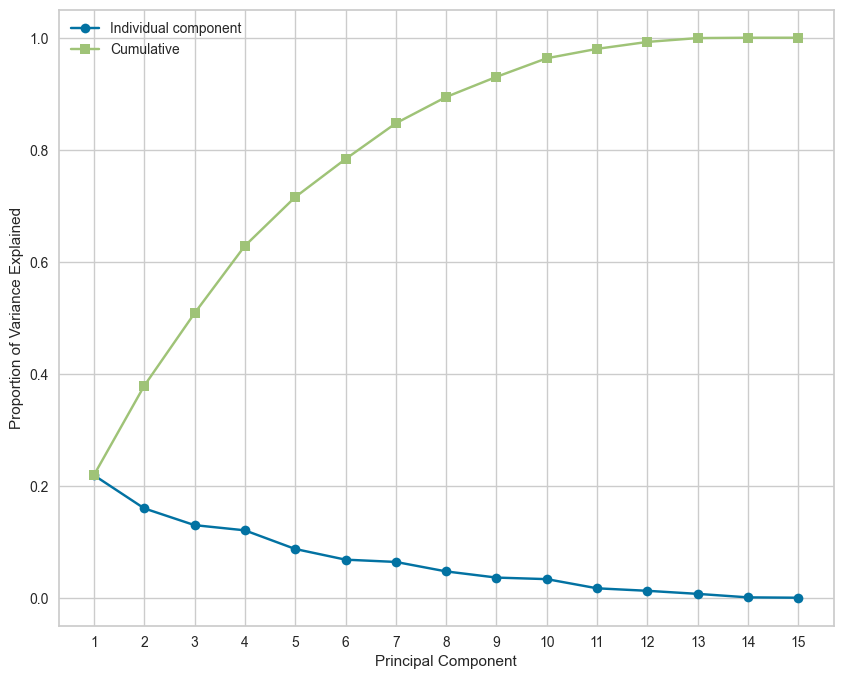

In [14]:
#graphing the cummulative explained variance plot
plt.figure(figsize=(10,8))

#create range of x ticks labels
feats = np.arange(len(pca.explained_variance_ratio_)) + 1

#plotting the lines
plt.plot(feats, pca.explained_variance_ratio_, '-o', label='Individual component')
plt.plot(feats, np.cumsum(pca.explained_variance_ratio_), '-s', label='Cumulative')

#annotating the graph
plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xticks(feats)
plt.legend(loc=2)

#showing the graph
plt.show();

In [15]:
np.cumsum(pca.explained_variance_ratio_)

array([0.21879903, 0.37834959, 0.50797121, 0.62830925, 0.71534746,
       0.78332812, 0.84722196, 0.89419062, 0.93015478, 0.96335194,
       0.98015713, 0.9925032 , 0.99938687, 0.99999999, 1.        ])

> Let's choose 9 PCs because they explain 93% of our dataset. The increases from PC10 and beyond is only incremental.

In [16]:
pca = PCA(n_components=9)

#fit and transform X to get the principal components from PCA
X_pca = pd.DataFrame(pca.fit_transform(X), 
                 columns=['PC'+str(i) for i in range(1,10)])
X_pca

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0      -3.102761  1.508369  1.612449  2.184904  1.975812  1.786389  2.346093   
1      -1.802254  1.171494  0.074572  3.954035  1.978705  1.845892  2.290224   
2      -3.379935  2.796132 -1.092142  0.325933 -0.421220  1.352064  2.499917   
3      -2.079428  2.459257 -2.630018  2.095064 -0.418327  1.411567  2.444048   
4      -3.480487 -0.424068  0.101561  0.700817  0.862015  1.490991 -0.341938   
...          ...       ...       ...       ...       ...       ...       ...   
579889  2.801720  0.503773 -0.305471  0.556099 -0.022557 -0.298622 -0.409068   
579890  1.359019  1.354171  0.908505 -1.473032  1.202895 -0.303659 -0.056594   
579891  2.783900  1.000264 -0.672804  0.358428  1.183119 -0.277437 -0.113477   
579892  1.538204  2.058410  1.180004 -1.266393  1.026404 -0.072812 -0.377002   
579893  2.963085  1.704503 -0.401305  0.565067  1.006628 -0.046589 -0.433885   

             PC8       PC9  
0       1.105544 -1.452726  
1       1.111448 -1.392880  
2       0.310244 -1.207435  
3       0.316149 -1.147589  
4       1.598697 -1.318203  
...          ...       ...  
579889 -0.402164  0.337951  
579890 -0.395886  0.357153  
579891 -0.381083  0.698243  
579892 -0.713329 -0.216815  
579893 -0.698526  0.124275  

[579894 rows x 9 columns]

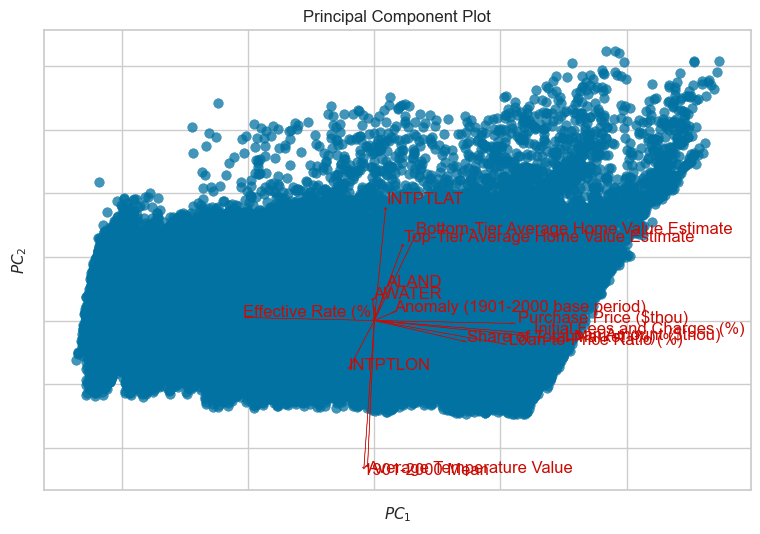

<Axes: title={'center': 'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$'>

In [17]:
visualizer = PCA_viz(proj_features=True)
visualizer.fit_transform(X)
visualizer.show()

> The Principal Component Plot shows interesting direction of our featyres. It seems temperature-related features (Average Value and 1991-2000 Mean) explain the dataset as much as housing-related features (purchase price, initial fees, etc.) and latitude. Latitude and Top-/Bottom- Tier Average Values seem to pull our data in relatively the same direction, suggesting colinearity, and are not in the same directions of Housing-related features as well as Temperature-related features.

## Model #1: KMeans Clustering

We will first attempt to do a KMeans clustering model and see if it a good unsupervised model for our data. I will proceed with a random_state = 10 and n_init = 10. 

We will also be using the **Davies-Bouldin Index** for scoring our dataset. I tried using Silhouette Score as my metric but my computer cannot calculate this score with the amount of data I have. When trxying to calculate the Silhouette Score for a default KMeans model with the PCA-transformed dataframe, I had to intervene at 52 minutes of runtime. For Davies-Bouldin, it took 8.3 seconds to run.

The Davies-Bouldin Index calculated the average 'similarity' between clusters. The smaller the index, the better with 0 being the lowest score (see Ref 6).

In [30]:
seed=10

### KMeans Function
We will first create a function to quickly apply KMeans modeling.

In [31]:
#create a function for faster KMeans modeling:

def KMeansModel(X, k):

    #Initialize the model
    kmeans = KMeans(k, n_init=seed, random_state=seed)

    #Train the Model
    kmeans.fit(X)

    #Evaluate perfomance
    score = davies_bouldin_score(X, kmeans.labels_)

    #return the performance
    return [score, kmeans.labels_]

### Tuning: Finding the Best K
We will now use two metrics: elbowvisualizer and calinski harabasz to determine the best cluster number for our KMeans. I will be plotting for both the dataset with and without PCA because I had some issue with the PCA dataset performing worst than without PCA, so just to make sure we are not missing out on a better model.

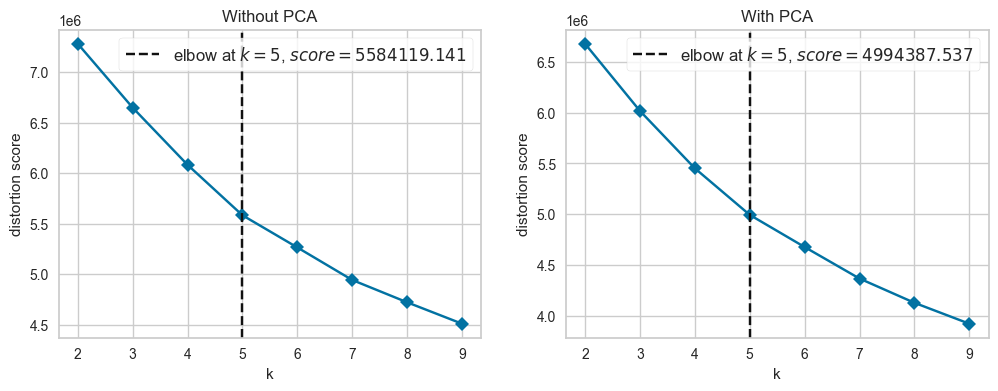

In [20]:
fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(12, 4))

#Plotting KMeans without PCA
model = KMeans(random_state=seed, n_init=seed)
visualizer = KElbowVisualizer(model, k=(2,10), timings = False, ax=ax1)
visualizer.fit(X)
visualizer.finalize()

#Plotting KMeans with PCA
model = KMeans(random_state=seed, n_init=seed)
visualizer = KElbowVisualizer(model, k=(2,10), timings = False,  ax=ax2)
visualizer.fit(X_pca)
visualizer.finalize()
ax1.set_title("Without PCA")
ax2.set_title("With PCA");

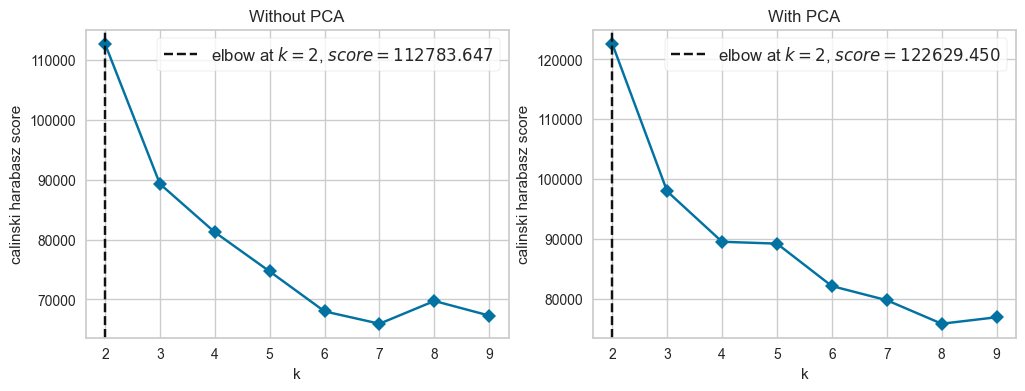

In [21]:
# Calinski Harabasz

fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(12, 4))

#Plotting KMeans without PCA
model = KMeans(random_state=seed)
visualizer = KElbowVisualizer(model, k=(2,10), metric='calinski_harabasz', 
                              timings=False, locate_elbow=True, ax=ax1)
visualizer.fit(X)
visualizer.finalize()

#plotting KMeans with PCA
model = KMeans(random_state=seed)
visualizer = KElbowVisualizer(model, k=(2,10), metric='calinski_harabasz', timings=False, locate_elbow=True,  ax=ax2)
visualizer.fit(X_pca)
visualizer.finalize()
ax1.set_title("Without PCA")
ax2.set_title("With PCA");

>From the two graphs, I will try both a k=5 and k=2 and see which k gives me the best index.

In [22]:
print('No PCA, K = 5, Davies-Bouldin Index: ', KMeansModel(X, 5)[0])
print('No PCA, K = 2, Davies-Bouldin Index: ', KMeansModel(X, 2)[0])
print('PCA, K = 5, Davies-Bouldin Index: ', KMeansModel(X_pca, 5)[0])
print('PCA, K = 2, Davies-Bouldin Index: ', KMeansModel(X_pca, 2)[0])

No PCA, K = 5, Davies-Bouldin Index:  1.7747775910854127
No PCA, K = 2, Davies-Bouldin Index:  2.08145504187499
PCA, K = 5, Davies-Bouldin Index:  1.6855474445079757
PCA, K = 2, Davies-Bouldin Index:  1.9944492123913429


> The best KMneans model is K=5 with PCs because it gives the smallest DB index. Let's save that result and see if we can get a better index from other models. My goal is to find something that gives me an index smaller than 1.

### Visualizing Results for the Best KMeans
We will extract the labels and visualize the clusters between Housing Prices and Average Temperature.

In [79]:
# defining a function for quicker visualization
def visualizing_cluster(X_results, labels, method):
    
    #initalizing subplots
    fig, ax = plt.subplots(1,2, figsize=(15,7))
    fig.suptitle('Box Plots for Purchase Price and Average Temperature by Cluster, '+ method)

    #selecting price and average temperature
    cols = ['Purchase Price ($thou)','Average Temperature Value']

    #plotting
    for i in range(2):
        sns.boxplot(ax = ax[i], data= X_results, y = cols[i], x = labels).set(xlabel = 'Cluster')

    #showing the plot
    plt.tight_layout(pad=2)
    plt.show()

    #initializing a figure
    fig = plt.figure(figsize = (15,7))

    #plotting the scatterplot
    sns.scatterplot(data = X_results, x = 'Purchase Price ($thou)', y = 'Average Temperature Value', hue = labels, palette='tab10').set(title = 'Purchase Price and Average Temperature Clusters, ' + method)
    plt.legend(title='Clusters', loc='upper left')

    #showing the plot
    plt.show()

In [32]:
# getting the best kmeans
score_kmeans, labels_kmeans = KMeansModel(X_pca, 5)

In [39]:
# creating a results dataframe with labels
X_results = unsupervised.copy()

# add a column for KMeans Labels
X_results["labels_kmeans"] = labels_kmeans
X_results.head()

1901-2000 Mean     ALAND    AWATER  Anomaly (1901-2000 base period)  \
0       -0.381145  2.208044  2.901962                         0.919214   
1       -0.381145  2.208044  2.901962                         0.919214   
2       -1.860682  0.029325  2.904380                         0.299393   
3       -1.860682  0.029325  2.904380                         0.299393   
4       -0.147226  0.562297  0.000387                         1.243881   

   Average Temperature Value  Bottom-Tier Average Home Value Estimate  \
0                  -0.198564                                 0.447549   
1                  -0.198564                                 0.447549   
2                  -1.797585                                -0.349259   
3                  -1.797585                                -0.349259   
4                   0.099064                                -0.512774   

   Effective Rate (%)  INTPTLAT  INTPTLON  Initial Fees and Charges (%)  \
0            2.478430 -0.821152 -2.267297                       0.10542   
1            2.632607 -0.821152 -2.267297                      -0.22329   
2            2.478430  0.846555  0.155777                       0.10542   
3            2.632607  0.846555  0.155777                      -0.22329   
4            2.478430 -1.761200 -0.457390                       0.10542   

   Loan Amount ($thou)  Loan-to-Price Ratio (%)  Purchase Price ($thou)  \
0            -2.007124                -0.913730               -2.350378   
1            -1.279980                 1.004406               -2.535091   
2            -2.007124                -0.913730               -2.350378   
3            -1.279980                 1.004406               -2.535091   
4            -2.007124                -0.913730               -2.350378   

   Share of Total Market (%)  Top-Tier Average Home Value Estimate  \
0                  -1.040546                              0.545656   
1                   0.813359                              0.545656   
2                  -1.040546                              0.081240   
3                   0.813359                              0.081240   
4                  -1.040546                             -0.319086   

   labels_kmeans  
0              2  
1              3  
2              2  
3              1  
4              2

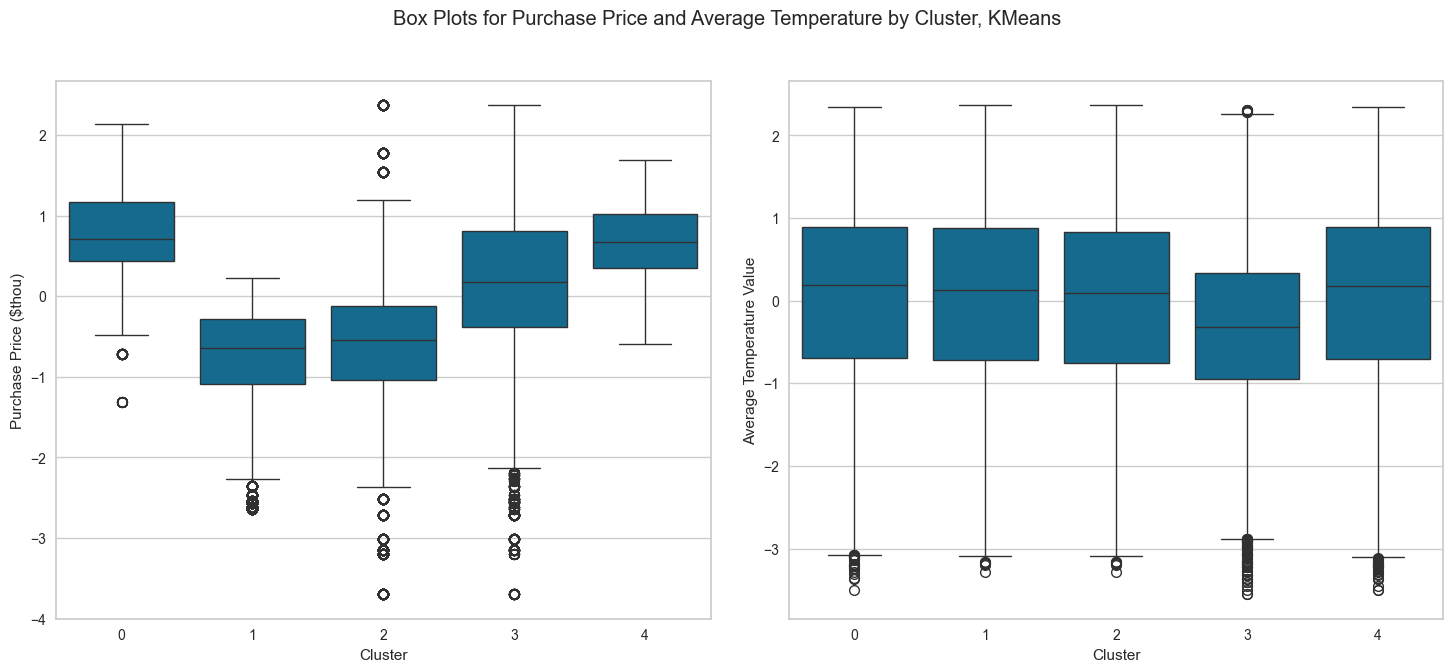

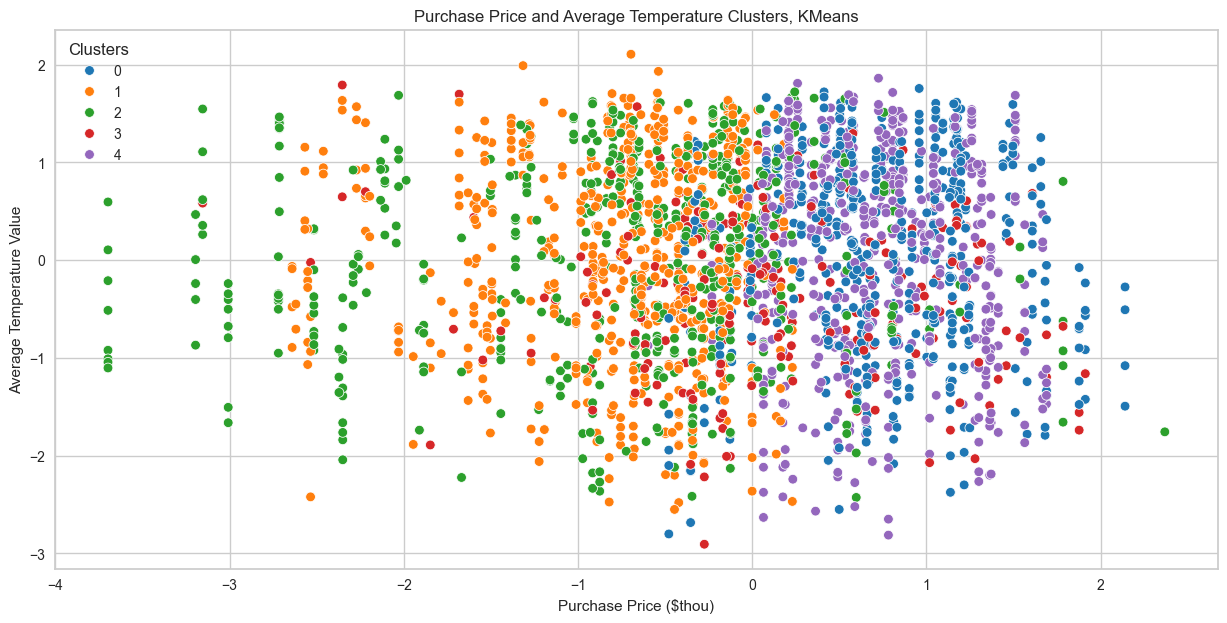

In [80]:
#calling our function to visualize the results
visualizing_cluster(X_results, 'labels_kmeans', 'KMeans')

## Model #2: Hierarchical Clustering

Next, we will try Hierarchical clustering.

### Finding the best number of clusters
We first should use a dendogram to see which type of linkage and number of clusters might make sense for our dataset.

In [26]:
# plotting four dendograms, each with different linkage style

style = ['single', 'average', 'complete', 'ward'] 

for i in style:
    Z = linkage(X_pca, i)
    plt.figure(figsize=(20,10))
    plt.grid(False)
    plt.title(i+' linkage')
    plt.xlabel("index")
    plt.ylabel("distance")
    dendrogram(Z, leaf_font_size=10, truncate_mode='level',p=5);

MemoryError: Unable to allocate 1.22 TiB for an array with shape (168138235671,) and data type float64

> Because we have around 600,000 samples, hierarchical clustering will not run due to a MemoryError. Let's try hierarchical clustering with 10,000 random samples instead. We will be able to observe some clustering trends among our dataset but will not be able to get the labels for our entire dataset with hierarchical clustering.

In [65]:
# getting 10,000 samples
X_sample = X_pca.sample(10000, random_state=seed)

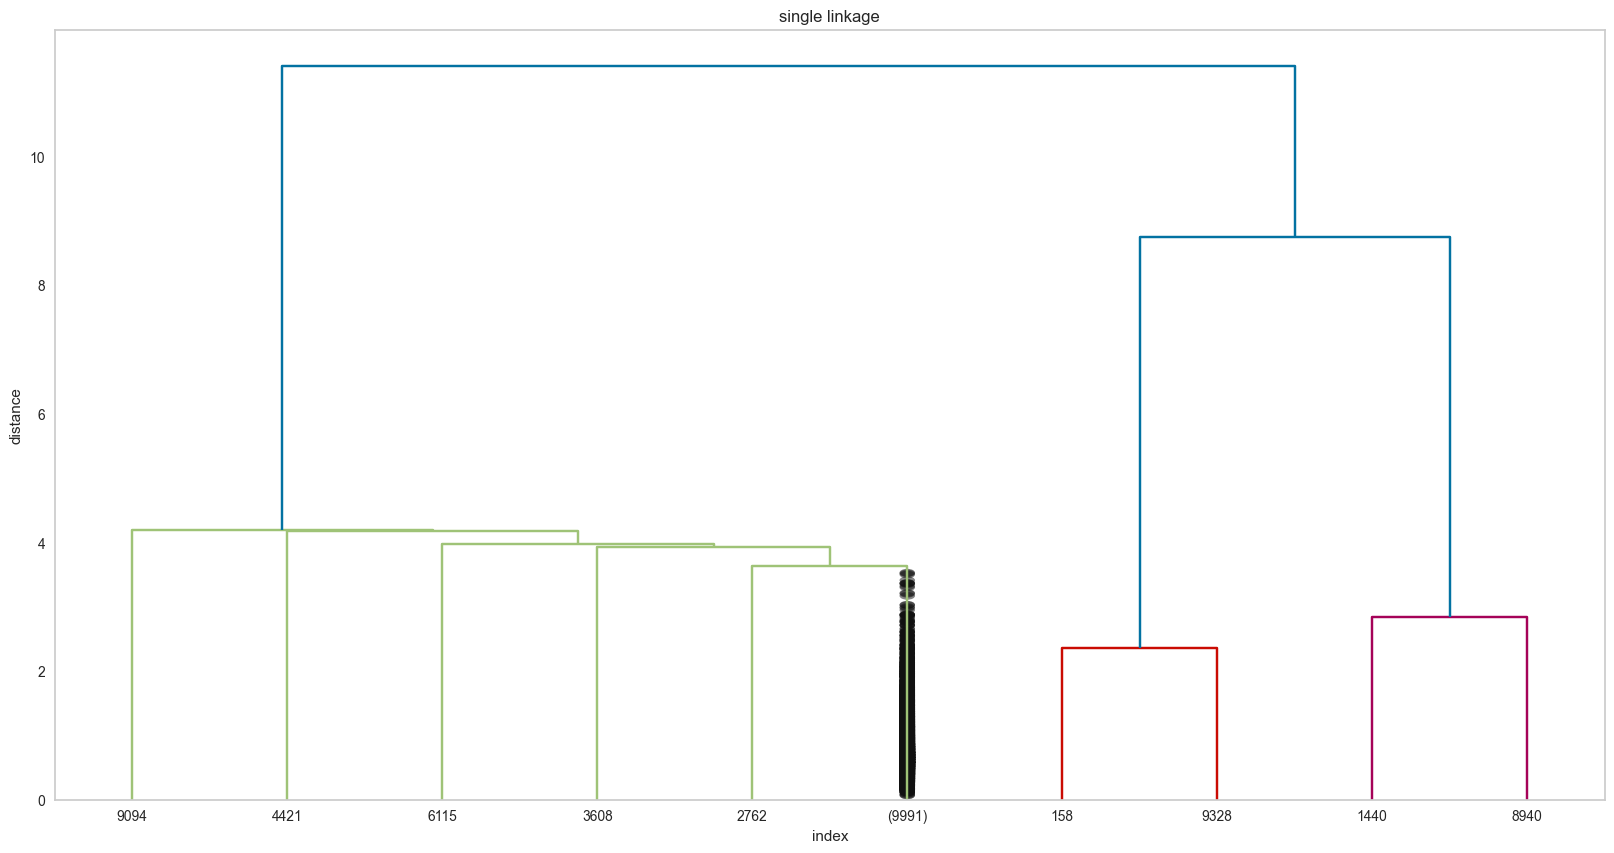

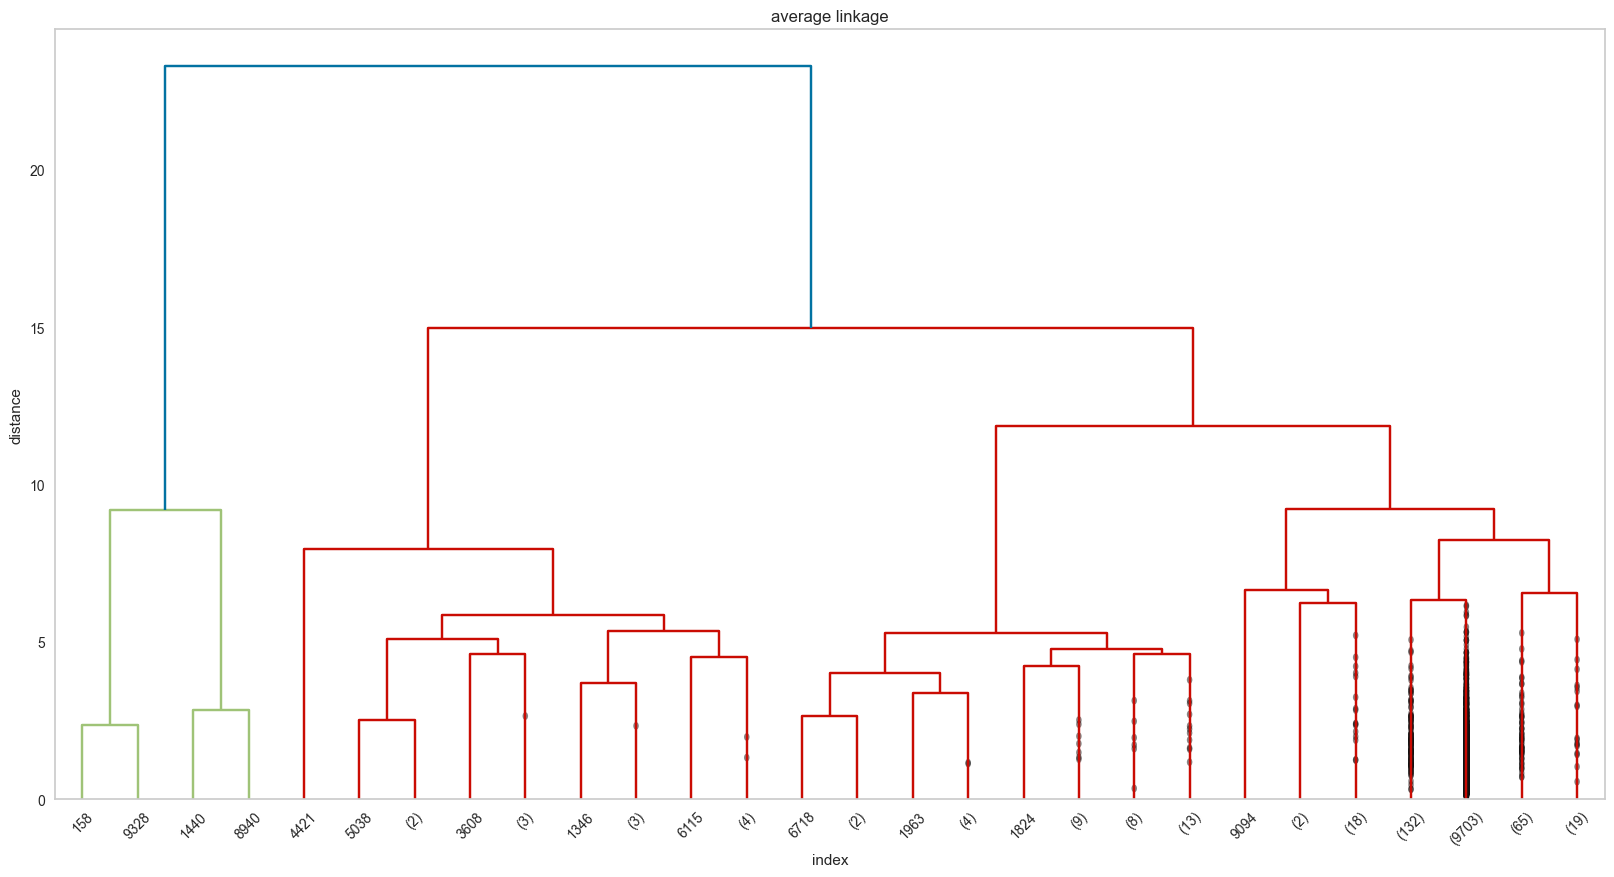

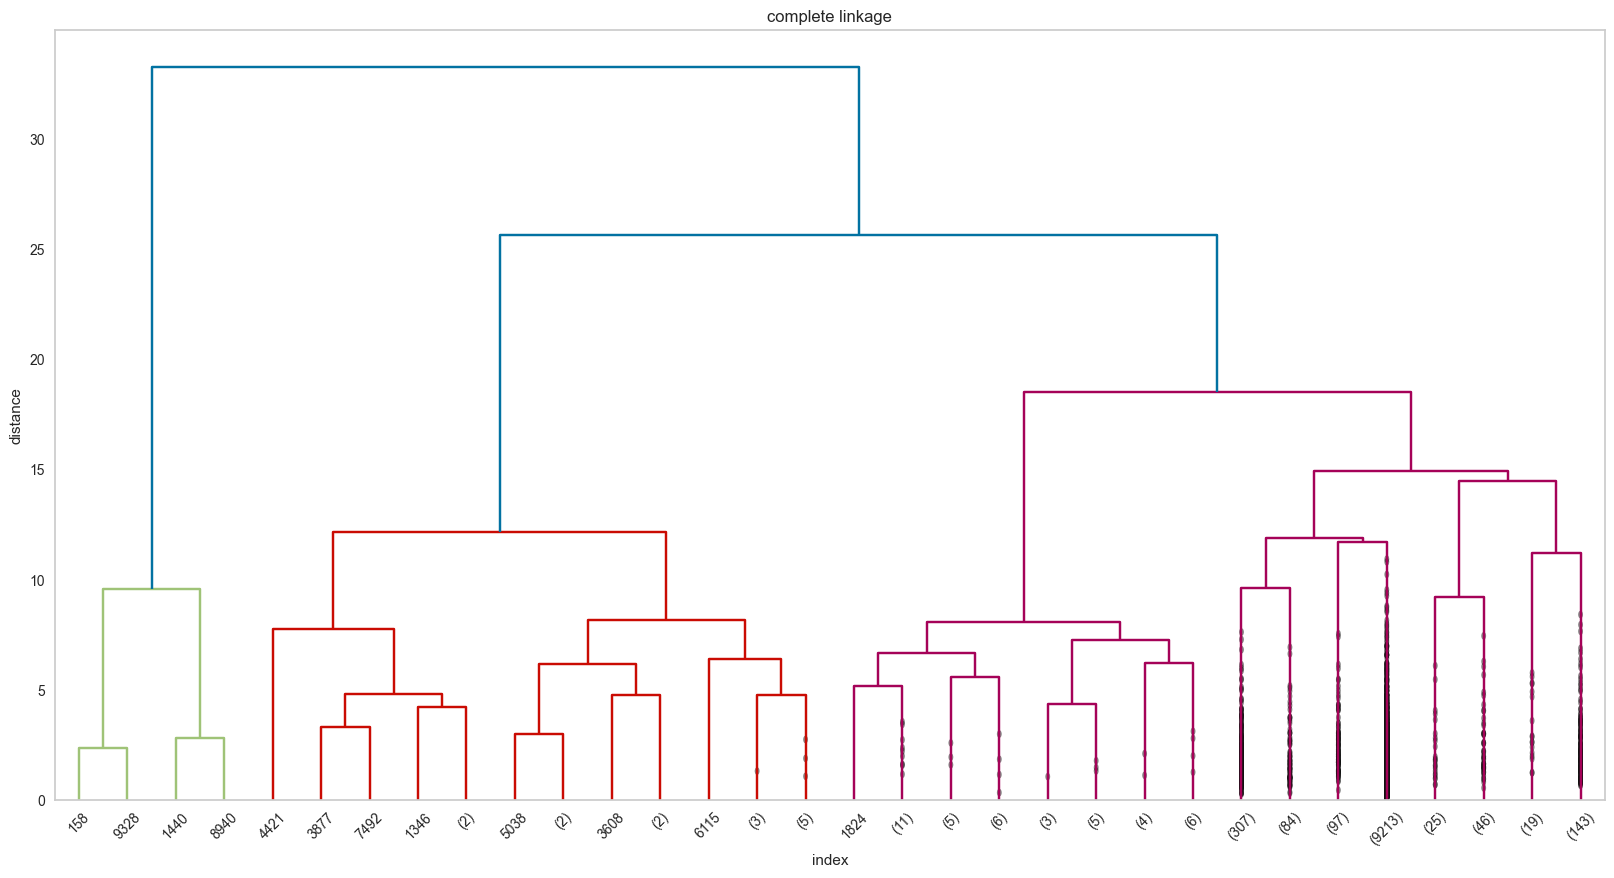

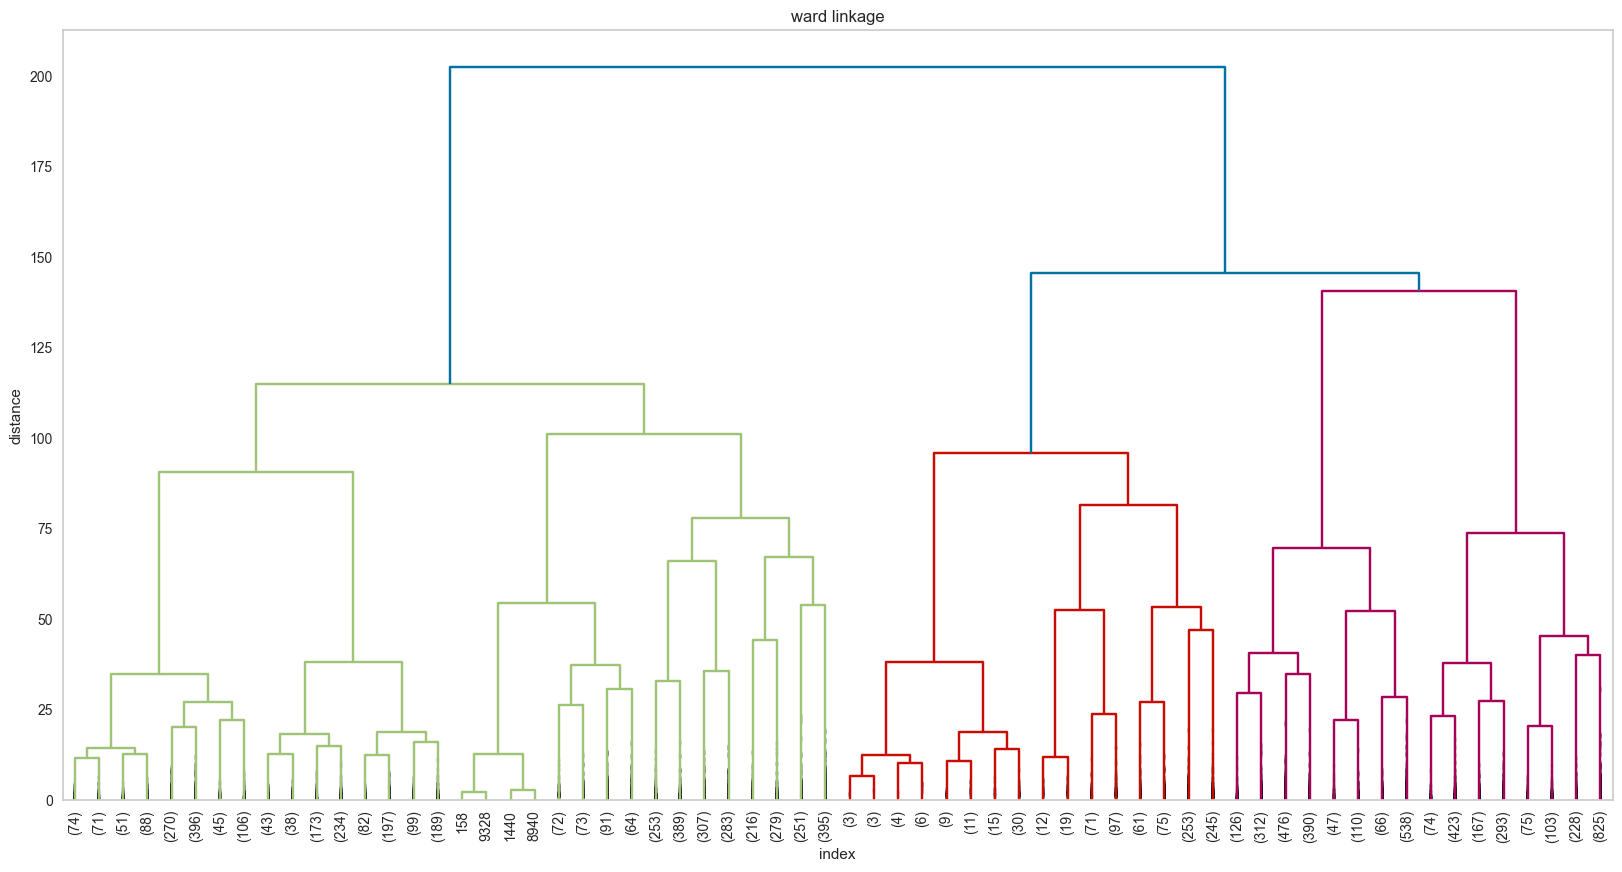

In [28]:
# replotting the dendogram with 10,000 samples.

#create a list of linkage types
style = ['single', 'average', 'complete', 'ward']


for i in style:

    #initialize linkage with 10,000 samples and same seed
    Z = linkage(X_sample, i)

    #annotating the dendogram
    plt.figure(figsize=(20,10))
    plt.grid(False)
    plt.title(i+' linkage')
    plt.xlabel("index")
    plt.ylabel("distance")

    #graphing the dendogram (using truncate_mode to only include the top nodes)
    dn = dendrogram(Z, truncate_mode='level', p = 5, leaf_font_size=10, show_contracted=True)
    plt.show()

> Looking at the count of samples at the end, I think ward has the best balance between the leaf. Let's focus on getting a cut-off that makes sense for the ward dendogram.

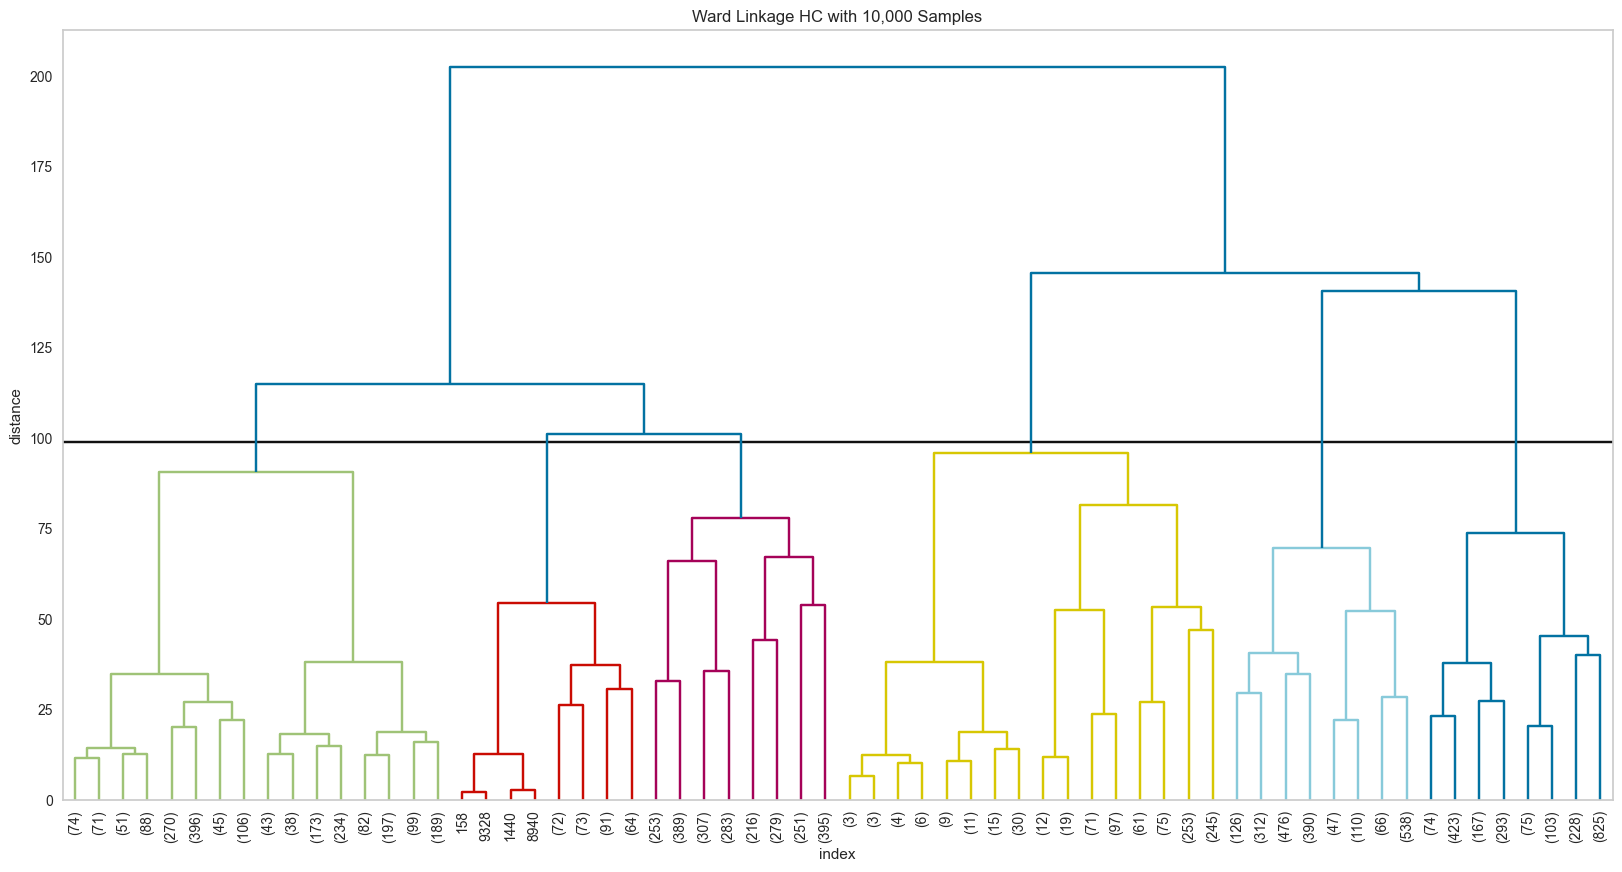

In [29]:
#initialize linkage with 10,000 samples and same seed
Z = linkage(X_sample, 'ward')

#annotate the plot
plt.figure(figsize=(20,10))
plt.grid(False)
plt.title('Ward Linkage HC with 10,000 Samples')
plt.xlabel("index")
plt.ylabel("distance")

#choosing a cut-off
d = 99

#adding the cut-off line
plt.axhline(y=d, c='k')

#graphing the dendogram (using truncate_mode to only include the top nodes)
dendrogram(Z, leaf_font_size=10, color_threshold=d, truncate_mode= 'level', p = 5)
plt.show()

### Conclusions
After trying out different d values, I find that between 95 and 100, I can cut up section A while keeping section B as one cluster (see attached image for better illustration). I want to cut section A into 2 clusters because there are leaves with huge index number (look at the leaves on the far left that have 9328, 1140, etc.). However, when d is lower than 95, it cuts section B into 2 smaller clusters which have very low index leaves of 3-4. To best balance these leaves, I need to cut up section A while maintaining section B. I found 99 to serve my purpose. That suggest **6 clusters** with **ward** linkage.   

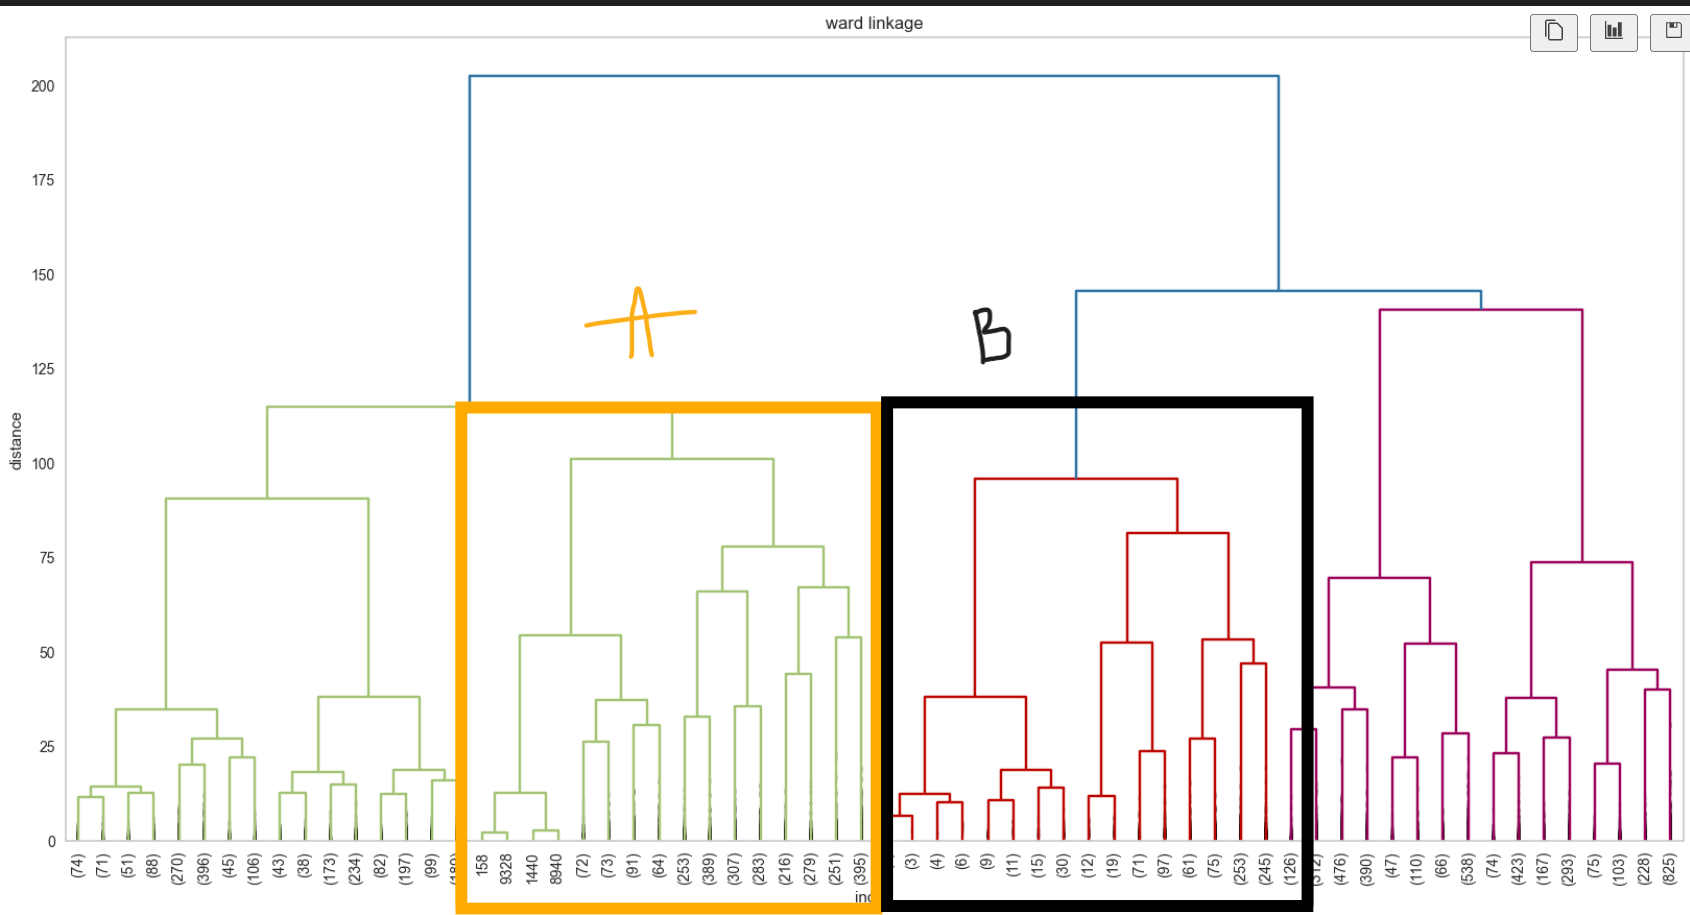

### Modeling
We now use AgglomerativeClustering() to see how our model perform.

In [67]:
hc = AgglomerativeClustering(n_clusters=6,linkage='ward')
labels_hc = hc.fit_predict(X_sample)
hc_score = davies_bouldin_score(X_sample, labels_hc)
print('Performance: ', hc_score)

Performance:  1.8459332058516003


> Not as good as KMeans and I also was not able to get labels for the full dataset, but let's visualize the results to see if there are interesting characteristics for the clusters using HC.

### Visualizing the Results

In [71]:
# creating a results dataframe with labels
X_sample_results = X.sample(10000, random_state = seed).copy()

# add a column for KMeans Labels
X_sample_results["labels_hc"] = labels_hc
X_sample_results.head()

1901-2000 Mean     ALAND    AWATER  Anomaly (1901-2000 base period)  \
473260        0.490204 -0.415567 -0.265258                         0.919214   
91859         1.525295 -0.238551 -0.299340                        -0.763156   
55272        -0.696935 -0.027988 -0.307251                        -0.822186   
572927       -1.989338 -0.199966 -0.326465                        -3.330982   
113911        0.478508 -0.079382 -0.300472                         0.565031   

        Average Temperature Value  Bottom-Tier Average Home Value Estimate  \
473260                   0.670977                                -0.073074   
91859                    1.371278                                -0.743542   
55272                   -0.858014                                -0.874072   
572927                  -2.643782                                -0.232808   
113911                   0.589275                                -0.141244   

        Effective Rate (%)  INTPTLAT  INTPTLON  Initial Fees and Charges (%)  \
473260           -1.465257  0.792215  0.364956                      1.392867   
91859             0.985347 -1.401634  0.346154                     -1.072457   
55272             0.823055  0.277131 -0.024738                     -1.729877   
572927           -0.150695  1.152972 -0.596456                      0.653270   
113911            0.879857  0.634146  0.767274                     -1.209420   

        Loan Amount ($thou)  Loan-to-Price Ratio (%)  Purchase Price ($thou)  \
473260             0.271623                -0.492676                1.175466   
91859             -0.228458                 0.817271               -0.924286   
55272             -1.450277                -1.907886               -0.541278   
572927             1.725912                 0.957622                1.278688   
113911            -0.171692                 0.595048               -0.701544   

        Share of Total Market (%)  Top-Tier Average Home Value Estimate  \
473260                  -1.050826                              0.229202   
91859                    0.477531                             -0.525498   
55272                   -0.643036                             -0.566126   
572927                   1.159467                              0.317384   
113911                   0.707128                              0.010095   

        labels_hc  
473260          1  
91859           4  
55272           3  
572927          2  
113911          4

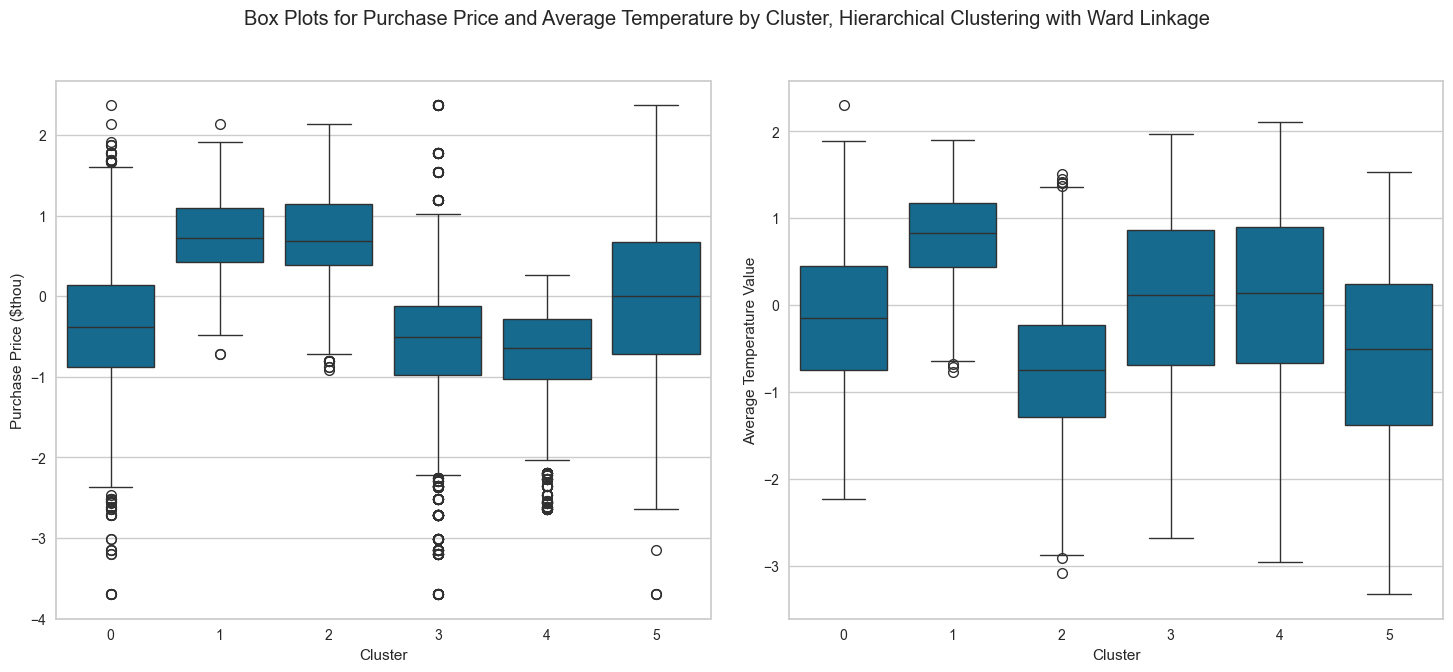

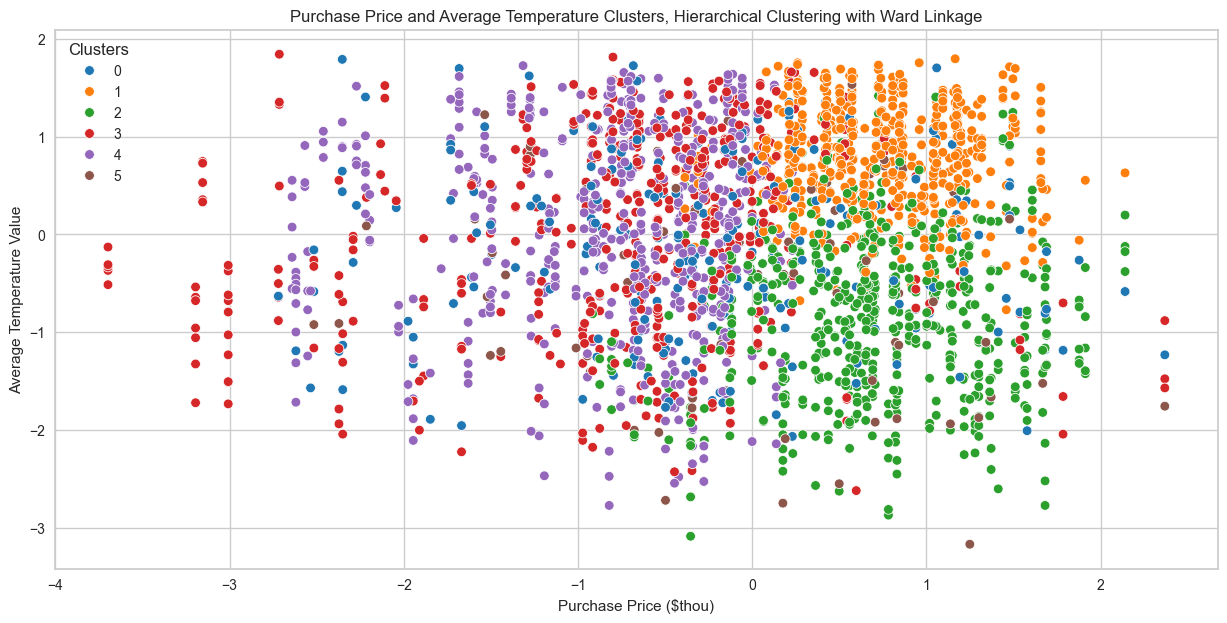

In [81]:
#calling our function to visualize the results
visualizing_cluster(X_sample_results, 'labels_hc', 'Hierarchical Clustering with Ward Linkage')

## Model #3: DBSCAN
This is an additional clustering model I will try. DBSCAN clusters by density and is scalable to big dataset. It views clusters as areas of high density separated by areas of low density and able to form clusters in any shape (as opposed to KMeans that assume our clusters are convex) (see Ref 13). It is quite popular among clusters with high density like our dataset.

### Default Model:
We will start with a default DBSCAN model. These parameters are: (eps=0.5, *, min_samples=5, metric='euclidean', metric_params=None, algorithm='auto', leaf_size=30, p=None, n_jobs=None) (see Ref 12). 

In [31]:
dbs = DBSCAN()
dbs.fit(X_pca)
score_dbs = davies_bouldin_score(X_pca, dbs.labels_)
print('Performance: ', score_dbs)

Performance:  1.274989918249017


> This is the best result we have seen so far! Let's try tuning DBSCAN and see if we can get to lower than 1.

### Tuning:
According to Ref. 14, two parameters are the most important to tune for DBSCAN: min_samples and eps (epsilon). 
- min_samples: Ref. 14 recommends choosing a min sample that is twice the number of dimensions in our dataset. The PC dataset has 9 components so let's definitely include 2*9 = 18 in our values for tuning.
- epsilon: after we have an optimized min_samples, ref. 14 recommends using a K-distance elbow plot to determine the best epsilon.

We will not use GridSearchCV for tuning our parameters due to run-time and some issues with its scoring metrics (does not accept Davies-Bouldin Index as a metric). I tried using GridSearchCV to evaluate between min_samples = 9 and min_samples = 18 without cv and it took 56 minutes to run (see below). The default dbscan only took 2 minutes so I think it's better to try about different values for these parameters through a for loop.

>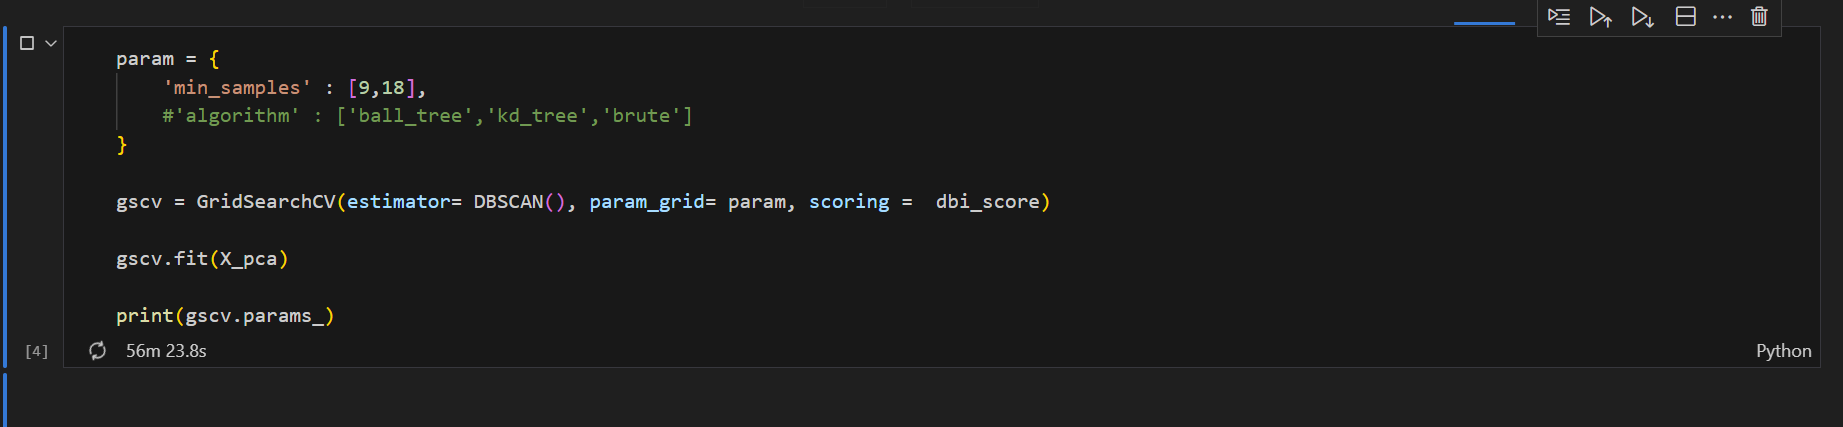

In [2]:
X_pca = pd.read_csv('X_pca.csv')
X_pca.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -3.102761  1.508369  1.612449  2.184904  1.975812  1.786389  2.346093   
1 -1.802254  1.171494  0.074572  3.954035  1.978705  1.845892  2.290224   
2 -3.379935  2.796132 -1.092142  0.325933 -0.421220  1.352064  2.499917   
3 -2.079428  2.459257 -2.630018  2.095064 -0.418327  1.411567  2.444048   
4 -3.480487 -0.424068  0.101561  0.700817  0.862015  1.490991 -0.341938   

        PC8       PC9  
0  1.105544 -1.452726  
1  1.111448 -1.392880  
2  0.310244 -1.207435  
3  0.316149 -1.147589  
4  1.598697 -1.318203

In [15]:
neighbors = NearestNeighbors(n_neighbors = 18)
neighbors.fit(X_pca)
distances, indices = neighbors.kneighbors(X_pca)
distances = np.sort(distances, axis=0)
distance = distances[:,1]

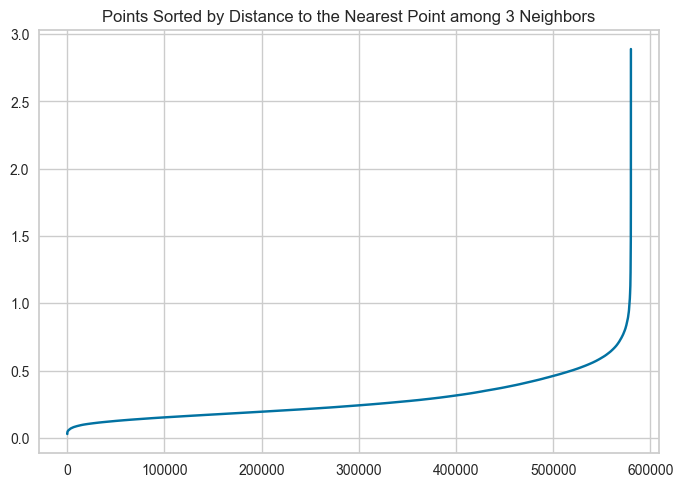

In [16]:
plt.plot(distance)
plt.title('Points Sorted by Distance to the Nearest Point among 18 Neighbors')
plt.show()

In [3]:
minPts = {}

for i in range(3,36,3):
    dbs = DBSCAN(min_samples=i)
    dbs.fit(X_pca)
    score = davies_bouldin_score(X_pca, dbs.labels_)
    minPts[i] = score

samples = pd.DataFrame(sorted(minPts.items(), key=lambda x:x[1]), columns = ['min_samples', 'DB Index'])

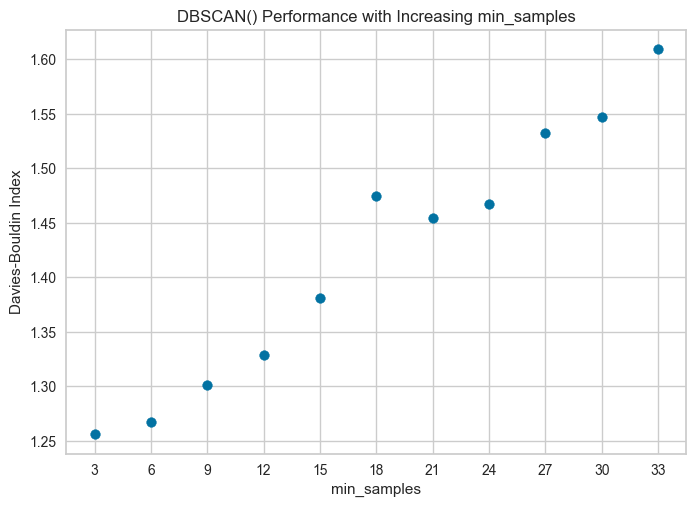

In [96]:
plt.scatter(samples['min_samples'], samples['DB Index'])
plt.xticks([i for i in range(3,36,3)])
plt.xlabel('min_samples')
plt.ylabel('Davies-Bouldin Index')
plt.title('DBSCAN() Performance with Increasing min_samples')
plt.show()

In [17]:
#takes 127 minutes to run

epsilon =[]

for i in [0.30+i*0.05 for i in range(12)]:
    dbs = DBSCAN(min_samples=samples['min_samples'][0], eps=i)
    dbs.fit(X_pca)
    score = davies_bouldin_score(X_pca, dbs.labels_)
    epsilon.append([i, score])

eps_3 = pd.DataFrame(epsilon, columns=['epsilon', 'DB Index'])

epsilon =[]

for i in [0.45+i*0.05 for i in range(12)]:
    dbs = DBSCAN(min_samples=18, eps=i)
    dbs.fit(X_pca)
    score = davies_bouldin_score(X_pca, dbs.labels_)
    epsilon.append([i, score])

eps_18 = pd.DataFrame(epsilon, columns=['epsilon', 'DB Index'])

In [18]:
eps_3

epsilon  DB Index
0      0.30  1.296045
1      0.35  1.243553
2      0.40  1.218322
3      0.45  1.235242
4      0.50  1.256093
5      0.55  1.286402
6      0.60  1.302217
7      0.65  1.317251
8      0.70  1.333157
9      0.75  1.335727
10     0.80  1.351814
11     0.85  1.347175

In [19]:
eps_18

epsilon  DB Index
0      0.45  1.473271
1      0.50  1.475011
2      0.55  1.348007
3      0.60  1.442000
4      0.65  1.376603
5      0.70  1.417793
6      0.75  1.397424
7      0.80  1.318577
8      0.85  1.335645
9      0.90  1.390239
10     0.95  1.397140
11     1.00  1.524045

In [ ]:
epsilon =[]

for i in [0.45+i*0.05 for i in range(12)]:
    dbs = DBSCAN(min_samples=18, eps=i)
    dbs.fit(X_pca)
    score = davies_bouldin_score(X_pca, dbs.labels_)
    epsilon.append([i, score])

eps_18 = pd.DataFrame(epsilon, columns=['epsilon', 'DB Index'])

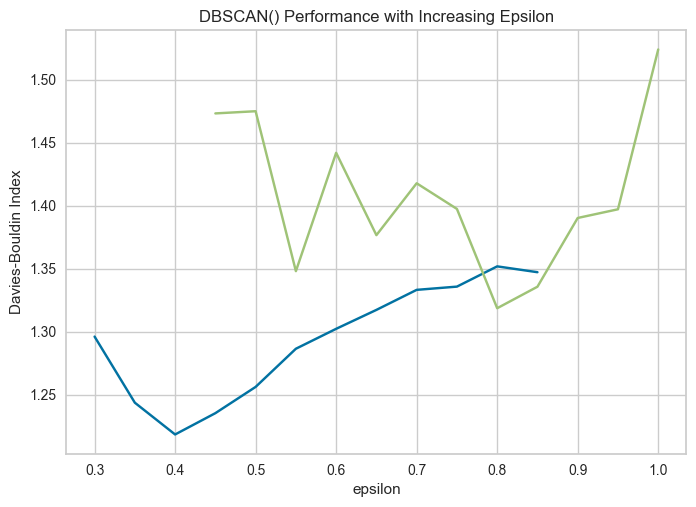

In [25]:
plt.plot(eps_3['epsilon'], eps_3['DB Index'], label = 'min_samples = 3')
plt.plot(eps_18['epsilon'], eps_18['DB Index'], label = 'min_samples = 18')
plt.xlabel('epsilon')
plt.ylabel('Davies-Bouldin Index')
plt.title('DBSCAN() Performance with Increasing Epsilon')
plt.show()

In [82]:
dbs = DBSCAN(min_samples = 3, eps = 0.4)
dbs.fit(X_pca)
labels_db_3 = dbs.labels_
score_dbs_3 = davies_bouldin_score(X_pca, labels_db_3)

In [83]:
dbs = DBSCAN(min_samples = 18, eps = 0.8)
dbs.fit(X_pca)
labels_db_18 = dbs.labels_
score_dbs_18 = davies_bouldin_score(X_pca, labels_db_18)

In [98]:
# Number of clusters and outliers in labels
n_clusters_ = len(set(labels_db_3)) - (1 if -1 in labels_db_3 else 0)
n_noise_ = list(labels_db_18).count(-1)

print('min_samples = 3:')
print(n_clusters_)
print(n_noise_)

min_samples = 3:
9415
74098


In [99]:
# Number of clusters in labels and outliers ignoring noise if present.
n_clusters_ = len(set(labels_db_18)) - (1 if -1 in labels_db_18 else 0)
n_noise_ = list(labels_db_18).count(-1)

print('min_samples = 18:')
print(n_clusters_)
print(n_noise_)

min_samples = 15:
145
74098


In [ ]:
X_results['labels_db_18'] = labels_db_18

In [ ]:
visualizing_cluster(X_results[X_results[labels_db_3]], 'labels_kmeans', 'KMeans')

## References:
1. Lab 10 Solutions: https://canvas.cmu.edu/courses/38950/files/11085230?module_item_id=5780126&fd_cookie_set=1
2. https://medium.com/analytics-vidhya/the-ultimate-guide-for-clustering-mixed-data-1eefa0b4743b
3. https://medium.com/@hhuseyincosgun/which-data-scaling-technique-should-i-use-a1615292061e
4. https://stackoverflow.com/questions/993358/creating-a-range-of-dates-in-python
5. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.date_range.html
6. https://scikit-learn.org/stable/modules/clustering.html#davies-bouldin-index
7. PCA and UL in class exercise solution: https://canvas.cmu.edu/courses/38950/files/11085228?module_item_id=5780124&fd_cookie_set=1
8. Lab 9 Solutions: https://canvas.cmu.edu/courses/38950/files/11085229?module_item_id=5780122&fd_cookie_set=1
9. https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html
10. https://www.displayr.com/what-is-hierarchical-clustering/
11. Hierarchical Clustering In-class Exercise Solutions: https://canvas.cmu.edu/courses/38950/files/11034273?module_item_id=5773724&fd_cookie_set=1
12. https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html
13. https://scikit-learn.org/stable/modules/clustering.html#dbscan
14. https://medium.com/@tarammullin/dbscan-parameter-estimation-ff8330e3a3bd
15. https://stats.stackexchange.com/questions/88872/a-routine-to-choose-eps-and-minpts-for-dbscan
16. https://kneed.readthedocs.io/en/stable/parameters.html
17. https://www.freecodecamp.org/news/sort-dictionary-by-value-in-python/
18. https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html